# DATA INPUT
## by Yiming Yuan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
df_train.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Pre-processing data

## EDA
## by Yu Hao

In [4]:
# Explore Quality Group and Water Quality
quality_group_counts = df_train['quality_group'].value_counts()
print(quality_group_counts)

print(' ')

water_quality_counts = df_train['water_quality'].value_counts()
print(water_quality_counts)

good        40640
salty        4168
unknown      1493
milky         648
colored       393
fluoride      178
Name: quality_group, dtype: int64
 
soft                  40640
salty                  3884
unknown                1493
milky                   648
coloured                393
salty abandoned         284
fluoride                162
fluoride abandoned       16
Name: water_quality, dtype: int64


In [5]:
# Explore Extraction Type, Extraction Type Group and Extraction Type Class
extraction_type_counts = df_train['extraction_type'].value_counts()
print(extraction_type_counts)

print(' ')

extraction_type_group_counts = df_train['extraction_type_group'].value_counts()
print(extraction_type_group_counts)

print(' ')

extraction_type_class_counts = df_train['extraction_type_class'].value_counts()
print(extraction_type_class_counts)

gravity                      21415
nira/tanira                   6578
other                         5106
submersible                   3834
swn 80                        2959
mono                          2306
india mark ii                 1910
afridev                       1391
ksb                           1107
other - rope pump              363
other - swn 81                 179
windmill                        89
india mark iii                  78
cemo                            74
other - play pump               73
walimi                          35
climax                          22
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64
 
gravity            21415
nira/tanira         6578
other               5106
submersible         4941
swn 80              2959
mono                2306
india mark ii       1910
afridev             1391
rope pump            363
other handpump       288
other motorpump       96
wind-powered          89
india mark iii        78
Name: e

In [6]:
# Explore Management and Management Group
management_counts = df_train['management'].value_counts()
print(management_counts)

print(' ')

management_group_counts = df_train['management_group'].value_counts()
print(management_group_counts)

vwc                 32395
wug                  5212
water board          2344
wua                  2018
private operator     1581
parastatal           1420
water authority       730
other                 672
company               564
unknown               448
other - school         73
trust                  63
Name: management, dtype: int64
 
user-group    41969
commercial     2938
parastatal     1420
other           745
unknown         448
Name: management_group, dtype: int64


In [7]:
# Explore Payment and Payment Type
payment_counts = df_train['payment'].value_counts()
print(payment_counts)

print(' ')

payment_type_counts = df_train['payment_type'].value_counts()
print(payment_type_counts)

never pay                20264
pay per bucket            7205
pay monthly               6637
unknown                   6505
pay when scheme fails     3155
pay annually              2927
other                      827
Name: payment, dtype: int64
 
never pay     20264
per bucket     7205
monthly        6637
unknown        6505
on failure     3155
annually       2927
other           827
Name: payment_type, dtype: int64


In [8]:
# Explore Source, Source Type, and Source Class
source_counts = df_train['source'].value_counts()
print(source_counts)

print(' ')

source_type_counts = df_train['source_type'].value_counts()
print(source_type_counts)

print(' ')

source_class_counts = df_train['source_class'].value_counts()
print(source_class_counts)

spring                  13616
shallow well            13437
machine dbh              8886
river                    7686
rainwater harvesting     1828
hand dtw                  723
lake                      613
dam                       518
other                     167
unknown                    46
Name: source, dtype: int64
 
spring                  13616
shallow well            13437
borehole                 9609
river/lake               8299
rainwater harvesting     1828
dam                       518
other                     213
Name: source_type, dtype: int64
 
groundwater    36662
surface        10645
unknown          213
Name: source_class, dtype: int64


In [9]:
# Explore Waterpoint Type and Waterpoint Type Group
waterpoint_type_counts = df_train['waterpoint_type'].value_counts()
print(waterpoint_type_counts)

print(' ')

waterpoint_type_group_counts = df_train['waterpoint_type_group'].value_counts()
print(waterpoint_type_group_counts)

communal standpipe             22782
hand pump                      14029
other                           5066
communal standpipe multiple     4913
improved spring                  629
cattle trough                     95
dam                                6
Name: waterpoint_type, dtype: int64
 
communal standpipe    27695
hand pump             14029
other                  5066
improved spring         629
cattle trough            95
dam                       6
Name: waterpoint_type_group, dtype: int64


## Eliminating columns that exhibited high redundancy
  ## by Yu Hao
* **`Quantity_group`** and **`Quantity`**: The two variables were perfectly collinear. To avoid redundancy, the variable 'Quantity' was arbitrarily retained while 'Quantity_group' was removed.

* **`Quality_group`** and **`Water_quality`**: The variable 'Water_quality' had a higher number of categories with lower frequency counts for each, raising concerns about potential overfitting. To circumvent this, 'Quality_group' was chosen due to its more balanced distribution of categories.

* **`Extraction_type`, `Extraction_type_group`, `Extraction_type_class`**: The three variables were closely related, posing a risk of multicollinearity. To mitigate this, the 'Extraction_type_class' variable, which had the fewest and most generalized categories, was retained.

* **`Management`** and **`Management_group`**: The variable 'Management' contained categories that were challenging to interpret, thus 'Management_group' was chosen due to its superior interpretability.

* **`Payment`** and **`Payment_type`**: Both variables had identical category counts and frequencies. However, 'Payment_type' was selected due to its more intuitive category labels.

* **`Source`, `Source_type`,** and **`Source_class`**: The variable 'Source_type' was chosen since it combined the 'other/unknown' and 'river/lake' categories of the other two variables but retained a higher level of detail compared to 'Source_class', which was deemed insufficiently specific.

* **`Waterpoint_type`** and **`Waterpoint_type_group`**: The distinction between 'communal standpipe' and 'communal standpipe multiple' in the 'Waterpoint_type' variable was considered negligible. Hence, 'Waterpoint_type_group' was selected for its more generalized categorization.

In [10]:
remove_columns = ['quantity_group','water_quality','extraction_type','extraction_type_group','management',\
                  'payment','source','source_class','waterpoint_type']
for column in remove_columns:
    df_train.drop(columns = column, inplace = True)
    df_test.drop(columns = column, inplace = True)

In [11]:
df_train.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,False,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,True,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,functional
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,True,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,non functional
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional


## another method using one hot encoding by Yiming Yuan

In [12]:
## another method: use one-hot encoding to create interaction terms between the resulting one-hot encoded columns.
# One-hot encoding for the 'quantity' column
# quantity_dummies = pd.get_dummies(df['quantity'], prefix='quantity')

# Multiplying 'population' by the one-hot encoded 'quantity' columns
# for col in quantity_dummies.columns:
#     df[col+'_population_interaction'] = df['population'] * quantity_dummies[col]

# One-hot encoding for the 'management' column
# management_dummies = pd.get_dummies(df['management'], prefix='management')

# One-hot encoding for the 'scheme_management' column
# scheme_management_dummies = pd.get_dummies(df['scheme_management'], prefix='scheme_management')

# Multiplying 'management' by the one-hot encoded 'scheme_management' columns
# for col_m in management_dummies.columns:
#     for col_s in scheme_management_dummies.columns:
#         df[col_m + '_' + col_s + '_interaction'] = management_dummies[col_m] * scheme_management_dummies[col_s]

# One-hot encoding for the 'water_quality' column
# water_quality_dummies = pd.get_dummies(df['water_quality'], prefix='water_quality')

# One-hot encoding for the 'quality_group' column
# quality_group_dummies = pd.get_dummies(df['quality_group'], prefix='quality_group')

# Multiplying 'water_quality' by the one-hot encoded 'quality_group' columns
# for col_wq in water_quality_dummies.columns:
#     for col_qg in quality_group_dummies.columns:
#         df[col_wq + '_' + col_qg + '_interaction'] = water_quality_dummies[col_wq] * quality_group_dummies[col_qg]

# One-hot encoding for the 'payment_type' column
# payment_type_dummies = pd.get_dummies(df['payment_type'], prefix='payment_type')

# One-hot encoding for the 'waterpoint_type' column
# waterpoint_type_dummies = pd.get_dummies(df['waterpoint_type'], prefix='waterpoint_type')

# Multiplying 'payment_type' by the one-hot encoded 'waterpoint_type' columns
# for col_pt in payment_type_dummies.columns:
#     for col_wt in waterpoint_type_dummies.columns:
#         df[col_pt + '_' + col_wt + '_interaction'] = payment_type_dummies[col_pt] * waterpoint_type_dummies[col_wt]

## EDA by Yiming Yuan

In [13]:
# Explore Recorded By
recorded_by_counts = df_train['recorded_by'].value_counts()
print(recorded_by_counts)

GeoData Consultants Ltd    47520
Name: recorded_by, dtype: int64


In [14]:
# Explore Funder
funder_counts = df_train['funder'].value_counts()
print(funder_counts)

print('Null values: ', df_train['funder'].isnull().sum())

print('Number of variables: ', len(df_train['funder'].unique()))

Government Of Tanzania     7283
Danida                     2496
Hesawa                     1773
World Bank                 1106
Rwssp                      1086
                           ... 
Chacha Issame                 1
Villege Council               1
Kilimarondo Parish            1
Mboni Salehe                  1
Kwang-nam Middle-school       1
Name: funder, Length: 1679, dtype: int64
Null values:  2889
Number of variables:  1680


In [15]:
# Explore Installer
installer_counts = df_train['installer'].value_counts()
print(installer_counts)

print('Null values: ', df_train['installer'].isnull().sum())

print('Number of variables: ', len(df_train['installer'].unique()))

DWE           13979
Government     1448
RWE             945
Commu           843
DANIDA          829
              ...  
Stephano          1
J. Mc             1
OLS               1
wasab             1
Water aid         1
Name: installer, Length: 1901, dtype: int64
Null values:  2909
Number of variables:  1902


In [16]:
# Explore WPT Name
wpt_name_counts = df_train['wpt_name'].value_counts()
print(wpt_name_counts)

print('Null values: ', df_train['wpt_name'].isnull().sum())

print('Number of variables: ', len(df_train['wpt_name'].unique()))

none                         2883
Shuleni                      1400
Zahanati                      671
Msikitini                     400
Kanisani                      256
                             ... 
Majengo Kati                    1
Kwa Ndere                       1
Shule Ya Msingi Kerezange       1
Mazimbo                         1
Gwamba Luchenje                 1
Name: wpt_name, Length: 30761, dtype: int64
Null values:  0
Number of variables:  30761


In [17]:
# Explore Num Private
num_private_counts = df_train['num_private'].value_counts()
print(num_private_counts)

print('Null values: ', df_train['num_private'].isnull().sum())

print('Number of variables: ', len(df_train['num_private'].unique()))

0      46915
6         70
1         54
5         40
8         36
       ...  
35         1
141        1
213        1
698        1
111        1
Name: num_private, Length: 62, dtype: int64
Null values:  0
Number of variables:  62


In [18]:
# Explore Subvillage
subvillage_counts = df_train['subvillage'].value_counts()
print(subvillage_counts)

print('Null values: ', df_train['subvillage'].isnull().sum())

print('Number of variables: ', len(df_train['subvillage'].unique()))

Madukani           413
Majengo            408
Shuleni            401
Kati               305
Mtakuja            203
                  ... 
Nchimilo             1
Masengete            1
Mbuta Magharibi      1
Maramato             1
Gwach                1
Name: subvillage, Length: 17242, dtype: int64
Null values:  298
Number of variables:  17243


In [19]:
# Explore Region and Region Code
print('REGION')
region_counts = df_train['region'].value_counts()
print(region_counts)

print('Null values: ', df_train['region'].isnull().sum())

print('Number of variables: ', len(df_train['region'].unique()))

print('REGION CODE')
region_code_counts = df_train['region_code'].value_counts()
print(region_code_counts)

print('Null values: ', df_train['region_code'].isnull().sum())

print('Number of variables: ', len(df_train['region_code'].unique()))

#Check to see if region and region_code match
temporary = df_train.loc[df_train.region == 'Lindi']
temporary[['region', 'region_code']].head()

REGION
Iringa           4267
Shinyanga        3990
Mbeya            3723
Kilimanjaro      3502
Morogoro         3193
Arusha           2698
Kagera           2677
Mwanza           2502
Kigoma           2235
Pwani            2084
Ruvuma           2069
Tanga            2044
Dodoma           1734
Singida          1689
Tabora           1561
Mara             1550
Rukwa            1446
Mtwara           1402
Manyara          1258
Lindi            1250
Dar es Salaam     646
Name: region, dtype: int64
Null values:  0
Number of variables:  21
REGION CODE
11    4272
17    4013
12    3723
3     3502
5     3222
18    2683
19    2458
2     2451
16    2235
10    2069
4     2015
1     1734
13    1689
14    1577
20    1550
15    1446
6     1278
21    1258
80    1004
60     805
90     743
7      646
99     343
9      316
24     247
8      240
40       1
Name: region_code, dtype: int64
Null values:  0
Number of variables:  27


,region,region_code
26,Lindi,80
91,Lindi,80
137,Lindi,18
148,Lindi,80
159,Lindi,80


In [20]:
# Explore Ward
ward_counts = df_train['ward'].value_counts()
print(ward_counts)

print('Null values: ', df_train['ward'].isnull().sum())

print('Number of variables: ', len(df_train['ward'].unique()))

Igosi            250
Imalinyi         196
Mdandu           188
Siha Kati        180
Nduruma          180
                ... 
Kihangimahuka      1
Mpigamiti          1
Nkome              1
Bondeni            1
Jibondo            1
Name: ward, Length: 2087, dtype: int64
Null values:  0
Number of variables:  2087


In [21]:
# Explore Scheme Name
scheme_name_counts = df_train['scheme_name'].value_counts()
print(scheme_name_counts)

print('Null values: ', df_train['scheme_name'].isnull().sum())

print('Number of variables: ', len(df_train['scheme_name'].unique()))

K                            556
None                         521
Borehole                     444
Chalinze wate                327
M                            310
                            ... 
KSLU07376                      1
Mradi wa maji Vijini           1
Matiganjola hydram Scheme      1
Villagers                      1
Magoto piped Water seplly      1
Name: scheme_name, Length: 2513, dtype: int64
Null values:  22523
Number of variables:  2514


In [22]:
# Explore Permit
permit_counts = df_train['permit'].value_counts()
print(permit_counts)

print('Null values: ', df_train['wpt_name'].isnull().sum())

True     31050
False    14044
Name: permit, dtype: int64
Null values:  0


In [23]:
# Explore Basin
basin_counts = df_train['basin'].value_counts()
print(basin_counts)

print('Null values: ', df_train['basin'].isnull().sum())

print('Number of variables: ', len(df_train['basin'].unique()))

Lake Victoria              8189
Pangani                    7171
Rufiji                     6361
Internal                   6224
Lake Tanganyika            5149
Wami / Ruvu                4777
Lake Nyasa                 4080
Ruvuma / Southern Coast    3602
Lake Rukwa                 1967
Name: basin, dtype: int64
Null values:  0
Number of variables:  9


In [24]:
# Explore LGA
lga_counts = df_train['lga'].value_counts()
print(lga_counts)

print('Null values: ', df_train['lga'].isnull().sum())

print('Number of variables: ', len(df_train['lga'].unique()))

Njombe          2011
Arusha Rural    1022
Moshi Rural      993
Bariadi          946
Rungwe           879
                ... 
Songea Urban      61
Kigoma Urban      55
Arusha Urban      50
Lindi Urban       18
Nyamagana          1
Name: lga, Length: 125, dtype: int64
Null values:  0
Number of variables:  125


In [25]:
# Explore Public Meeting
public_meeting_counts = df_train['public_meeting'].value_counts()
print(public_meeting_counts)

print('Null values: ', df_train['public_meeting'].isnull().sum())

print('Number of variables: ', len(df_train['public_meeting'].unique()))

True     40783
False     4086
Name: public_meeting, dtype: int64
Null values:  2651
Number of variables:  3


In [26]:
# Explore Scheme Management
scheme_management_counts = df_train['scheme_management'].value_counts()
print(scheme_management_counts)

print('Null values: ', df_train['scheme_management'].isnull().sum())

print('Number of variables: ', len(df_train['scheme_management'].unique()))

VWC                 29436
WUG                  4148
Water authority      2532
WUA                  2289
Water Board          2204
Parastatal           1346
Company               868
Private operator      843
Other                 596
SWC                    73
Trust                  59
None                    1
Name: scheme_management, dtype: int64
Null values:  3125
Number of variables:  13


In [27]:
# Explore Construction Year
construction_year_counts = df_train['construction_year'].value_counts()
print(construction_year_counts)

print('Null values: ', df_train['construction_year'].isnull().sum())

print('Number of variables: ', len(df_train['construction_year'].unique()))

0       16600
2010     2135
2008     2070
2009     2012
2000     1704
2007     1285
2006     1192
2003     1022
2011      988
2004      910
2012      891
1978      839
2002      836
2005      825
1995      787
1998      773
1990      766
1999      766
1985      747
1980      664
1996      642
1984      611
1982      599
1994      576
1972      567
1974      536
1997      516
1992      505
1993      481
2001      446
1988      415
1983      386
1975      350
1986      334
1976      327
1970      321
1991      260
1989      256
1987      247
1981      184
1977      169
1979      149
1973      146
2013      133
1971      114
1960       82
1967       73
1963       69
1968       63
1969       46
1964       34
1962       24
1961       19
1965       15
1966       13
Name: construction_year, dtype: int64
Null values:  0
Number of variables:  55


## Column Elimination Process
## by Yiming Yuan
Several individual columns were removed from the dataset due to a variety of reasons, enhancing the model's efficiency and robustness. The removed columns are as follows:

* **`Recorded_by`**: This column was eliminated as it contained only a single variable, offering no variation or informational value.
* **`Date_recorded`**: The date of recording was deemed irrelevant to the target variable and thus was excluded from the dataset.
* **`Funder`**: This column was removed due to its high cardinality, containing 1,680 unique variables.
* **`Installer`**: This column, with its high variable count of 1,902, was eliminated to reduce complexity.
* **`Wpt_name`**: Given its excessively high number of unique variables (30,761), this column was removed.
* **`Num_private`**: This column was removed as 99% of its values fell into the '0' category, offering limited variation.
* **`Subvillage`**: The 'Subvillage' column, consisting of 17,243 unique variables, was eliminated to reduce dimensionality.
* **`Region_code`**: Some codes were incorrectly labeled and did not align correctly with their corresponding regions, leading to the removal of this column.
* **`District_code`**: Due to its high correlation with the 'Region' column, 'District_code' was removed to avoid multicollinearity.
* **`Ward`**: This column was removed due to its high cardinality, containing 2,087 unique variables.
* **`Scheme_name`**: This column was removed due to its large number of null values (22,523) and high variable count (2,514).
* **`Id`**: The 'Id' column was eliminated as it offered no informational value relevant to the target variable.

In [28]:
columns_to_drop = ['recorded_by', 'date_recorded', 'funder', 'installer', 'wpt_name', 'num_private',
                   'subvillage', 'region_code', 'district_code', 'ward', 'scheme_name', 'id']

for column in columns_to_drop:
    df_train.drop(columns=column, inplace=True)
    df_test.drop(columns=column, inplace=True)

In [29]:
df_train.columns

Index(['Unnamed: 0', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

## Dealing with Missing Values
## by Yu Hao

In [30]:
# Print the number of null values for each feature
for column in df_train.columns:
    print(column, ' null values: ', df_train[column].isnull().sum())

Unnamed: 0  null values:  0
amount_tsh  null values:  0
gps_height  null values:  0
longitude  null values:  0
latitude  null values:  0
basin  null values:  0
region  null values:  0
lga  null values:  0
population  null values:  0
public_meeting  null values:  2651
scheme_management  null values:  3125
permit  null values:  2426
construction_year  null values:  0
extraction_type_class  null values:  0
management_group  null values:  0
payment_type  null values:  0
quality_group  null values:  0
quantity  null values:  0
source_type  null values:  0
waterpoint_type_group  null values:  0
status_group  null values:  0


In [31]:
#drop NAN values
df_train.dropna(how = 'any', inplace = True)
df_test.dropna(how = 'any', inplace = True)

In [32]:
df_train.shape

(39875, 21)

## another method to deal with missing values
## by Yiming Yuan

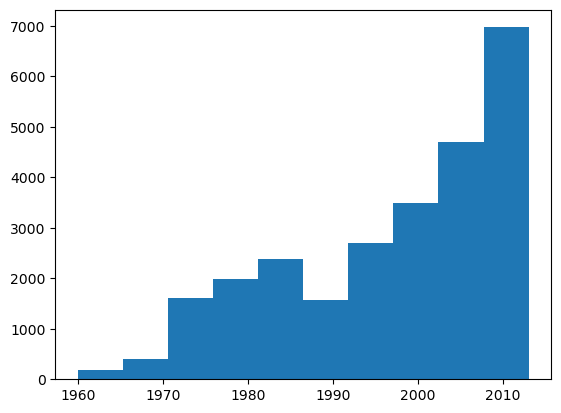

In [33]:
# explore distribution of non-zero(np.nan) values to determine how to impute
# will impute with mode

plt.hist(df_train['construction_year'].replace(0.0, np.nan));

In [34]:
# Fill missing values for categorical columns with 'unknown'
# df[['funder', 'installer', 'subvillage', 'scheme_management', 'scheme_name']] = df[['funder', 'installer', 'subvillage', 'scheme_management', 'scheme_name']].fillna('unknown')


# Fill missing values for boolean columns with the mode
# df['public_meeting'] = df['public_meeting'].fillna(df['public_meeting'].mode()[0])
# df['permit'] = df['permit'].fillna(df['permit'].mode()[0])

# Replace 0 'construction_year' with NaN
# df.loc[df['construction_year'] == 0, 'construction_year'] = np.nan

# Fill missing ages (where 'construction_year' is NaN) with the median age
# median_age = df['age'].median()
# df['age'] = df['age'].fillna(median_age)

# Replace 0 values in 'gps_height', 'longitude', and 'amount_tsh' with grouped median/mean values
# df['gps_height'] = df.groupby(['region', 'district_code'])['gps_height'].transform(lambda x: x.replace(0, x.median()))
# df['longitude'] = df.groupby(['region', 'district_code'])['longitude'].transform(lambda x: x.replace(0, x.mean()))
# df['amount_tsh'] = df.groupby(['region', 'district_code'])['amount_tsh'].transform(lambda x: x.replace(0, x.mean()))



* It is important to highlight that there are 20,709 entries with a value of zero in the `construction_year` column. This could potentially signify the presence of null values. This interpretation will be incorporated during the encoding process of `construction_year`.

* In a similar vein, the columns `amount_tsh`, `gps_height`, and `population` contain a substantial number of zero values, each exceeding 17,000. These zeroes could be placeholders for missing data, or, alternatively, they might legitimately represent a significant number of water pumps located in areas with no surrounding population. This possibility should be carefully considered during data preprocessing and analysis.

# Label Encoding the Target
## by Yiming Yuan

In [35]:
# Explore Status Group
status_group_counts = df_train['status_group'].value_counts()
print(status_group_counts)

print('Null values: ', df_train['status_group'].isnull().sum())

print('Number of variables: ', len(df_train['status_group'].unique()))

functional                 21874
non functional             15049
functional needs repair     2952
Name: status_group, dtype: int64
Null values:  0
Number of variables:  3


I have chosen to use a custom function instead of the standard Label Encoding function due to the control it affords over the assignment process. Specifically, the Label Encoding function does not provide the flexibility to designate which numerical value corresponds to which category, a feature that is necessary for my specific use case.

In [36]:
#For this project's purposes, the categories 'non-functional' and 'needs repair' are 
#considered similar and will be addressed later to balance the dataset. 
def encode_status_group(row):
    if row['status_group'] == 'functional':
        return 3
    elif row['status_group'] == 'functional needs repair':
        return 2
    elif row['status_group'] == 'non functional':
        return 1

df_train['status_group'] = df_train.apply(lambda row: encode_status_group(row), axis = 1)
df_test['status_group'] = df_test.apply(lambda row: encode_status_group(row), axis = 1)


In [37]:
df_train['status_group']

0        3
2        3
3        1
5        3
6        1
        ..
47514    2
47516    2
47517    1
47518    3
47519    3
Name: status_group, Length: 39875, dtype: int64

## Explore Geographical Categorical data
## by Yiming Yuan

In [38]:
%matplotlib inline

In [39]:
# Read in the shp file
tanz_map = gpd.read_file('tza_admbnda_adm0_20181019/tza_admbnda_adm0_20181019.shp')

<AxesSubplot:>

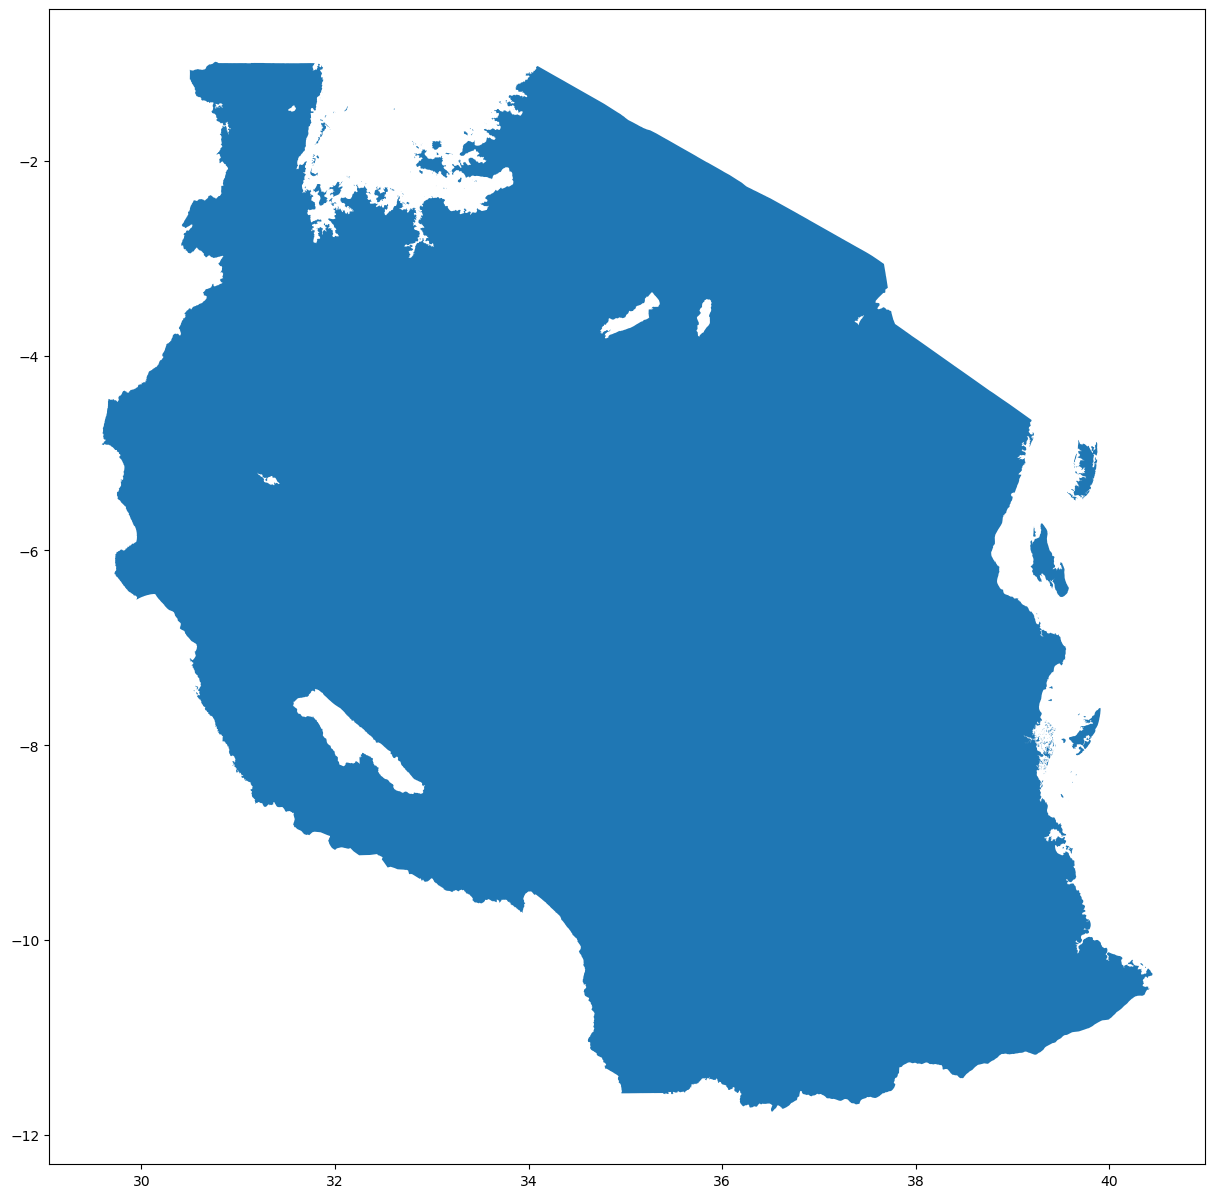

In [40]:
# Plot the map of Tanzania
fig, ax = plt.subplots(figsize = (15,15))
tanz_map.plot(ax = ax)

In [41]:
# Transform Longitude and Latitude into a Point
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_train['longitude'], df_train['latitude'])]
geometry[:3]

[<POINT (34.938 -9.856)>, <POINT (37.461 -3.821)>, <POINT (38.486 -11.155)>]

In [42]:
# Create a new dataframe that include the Point objects
geo_df = gpd.GeoDataFrame(df_train, crs = crs, geometry = geometry)
geo_df.head()

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Unnamed: 0,amount_tsh,gps_height,longitude,latitude,basin,region,lga,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,geometry
0,0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,True,...,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,3,POINT (34.93809 -9.85632)
2,2,25.0,686,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,True,...,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,3,POINT (37.46066 -3.82133)
3,3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,...,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,1,POINT (38.48616 -11.15530)
5,5,20.0,0,39.172796,-4.765587,Pangani,Tanga,Mkinga,1,True,...,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,3,POINT (39.17280 -4.76559)
6,6,0.0,0,33.362410,-3.766365,Internal,Shinyanga,Shinyanga Rural,0,True,...,0,handpump,user-group,never pay,good,enough,borehole,hand pump,1,POINT (33.36241 -3.76636)


array([[<AxesSubplot:title={'center':'longitude'}>]], dtype=object)

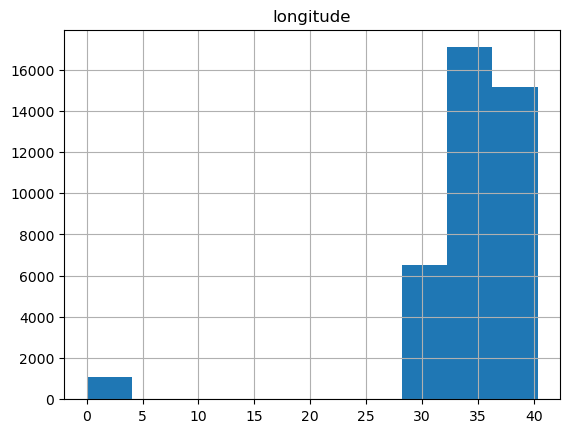

In [43]:
# Isolate outliers in longitude
geo_df.hist(column = 'longitude')

In [44]:
# Remove the longitude outliers. They were clearly mislabeled because they are not in Tanzania.
def remove_long_outliers(row):
    if row['longitude'] < 5:
        geo_df.drop(index = row.name, inplace = True)

geo_df.apply(lambda row: remove_long_outliers(row), axis = 1)

0        None
2        None
3        None
5        None
6        None
         ... 
47514    None
47516    None
47517    None
47518    None
47519    None
Length: 39875, dtype: object

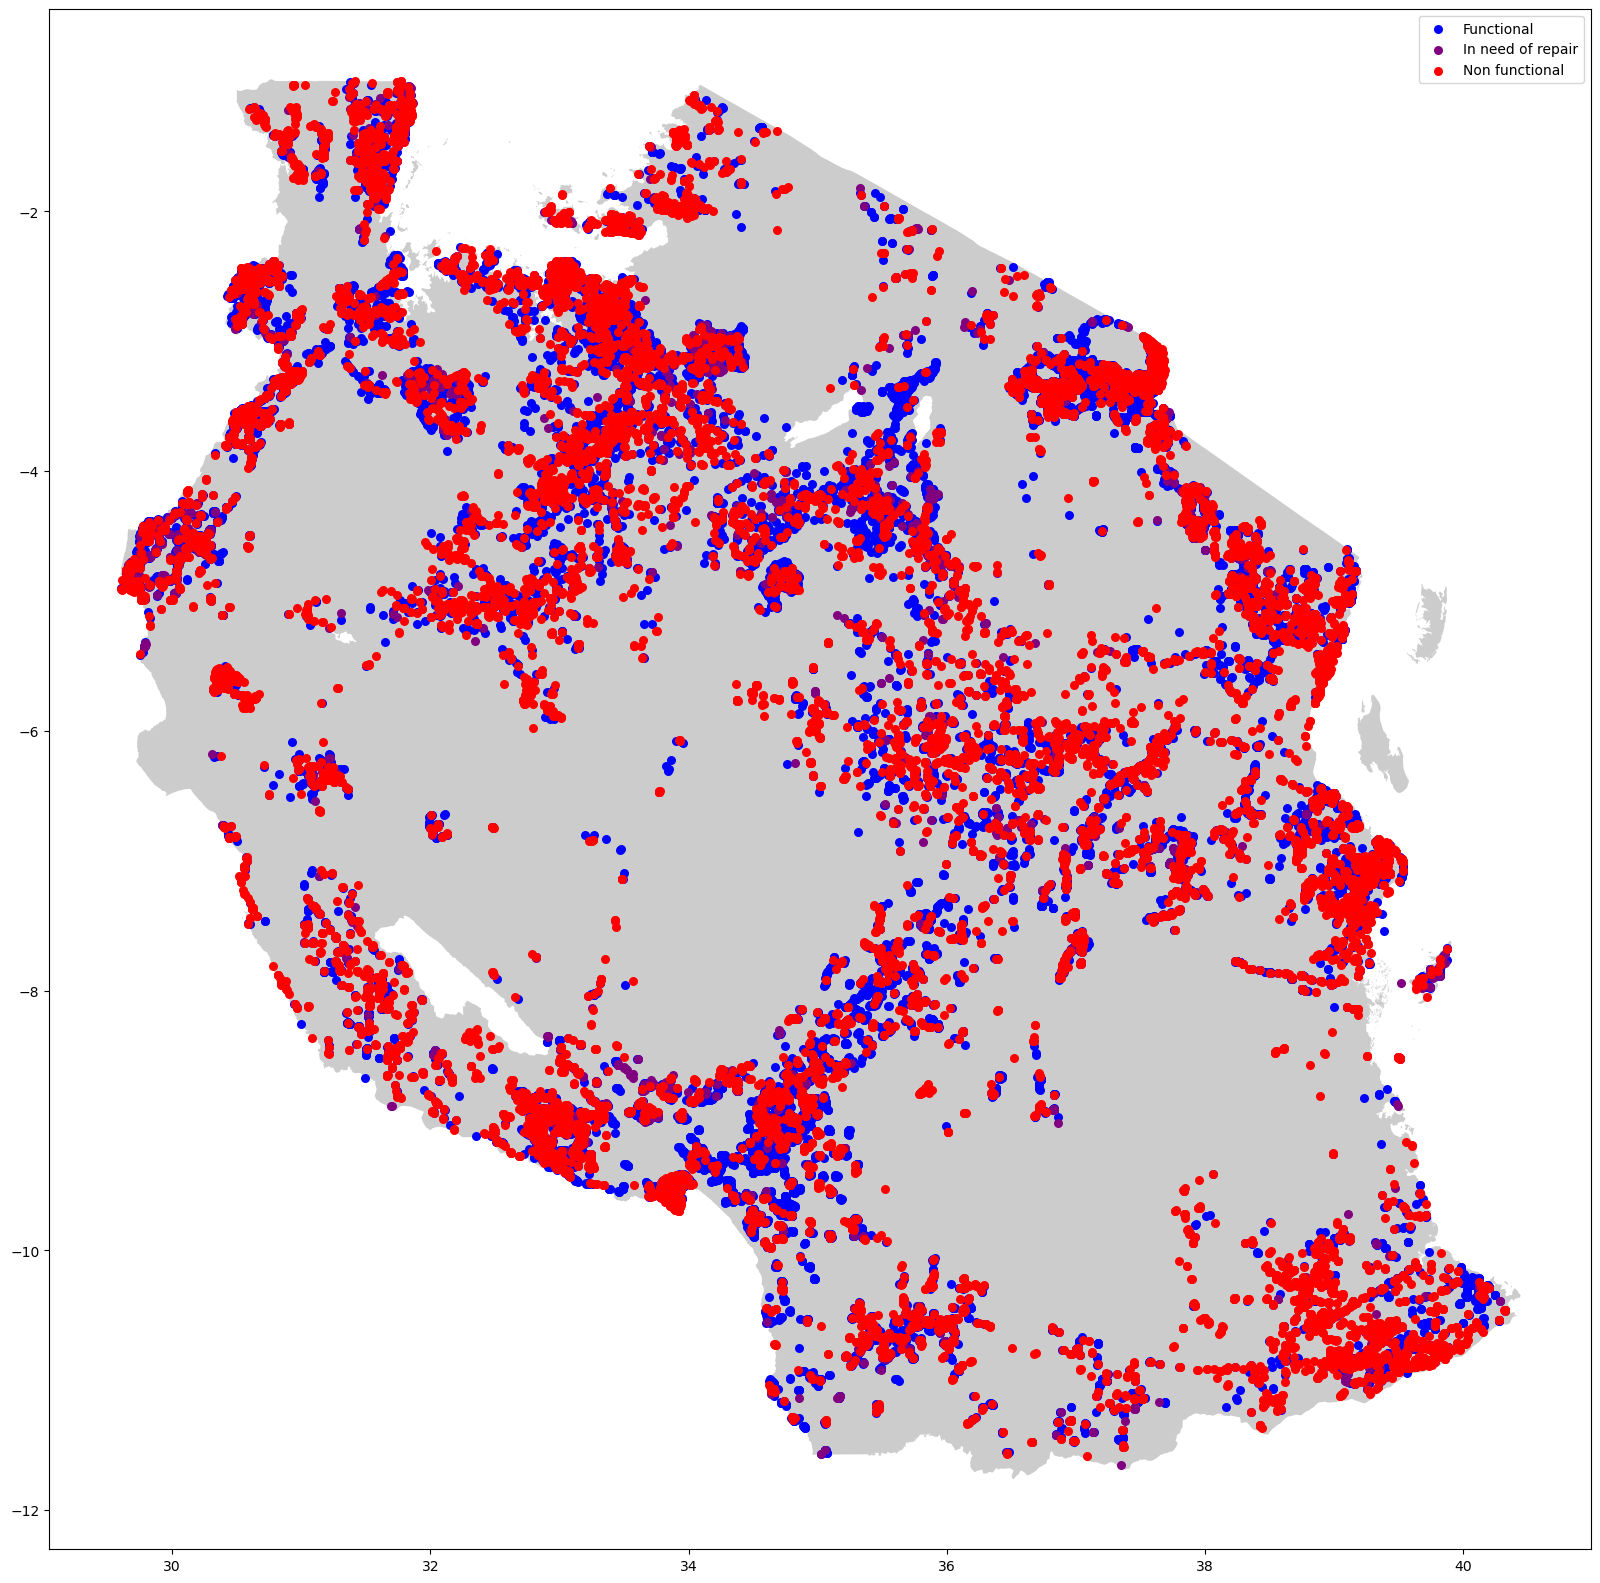

In [45]:
# Plot the water pumps over their location and color them based on whether they are functional,
# non-functional, or in need of repairs.
fig, ax = plt.subplots(figsize = (20,20))
tanz_map.plot(ax = ax, alpha = .4, color = "grey")

geo_df[geo_df['status_group'] == 3].plot(ax = ax, markersize = 30, color = 'blue', marker = 'o', label = 'Functional')
geo_df[geo_df['status_group'] == 2].plot(ax = ax, markersize = 30, color = 'purple', marker = 'o', label = 'In need of repair')
geo_df[geo_df['status_group'] == 1].plot(ax = ax, markersize = 30, color = 'red', marker = 'o', label = 'Non functional')

# Add a legend
plt.legend()

# Optional: Adjust the legend position
ax.legend(loc='upper right')

plt.show()

In [46]:
geo_df['basin'].unique()

array(['Lake Nyasa', 'Pangani', 'Ruvuma / Southern Coast', 'Internal',
       'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa',
       'Lake Victoria'], dtype=object)

In [47]:
geo_df.head(20)

,Unnamed: 0,amount_tsh,gps_height,longitude,latitude,basin,region,lga,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,geometry
0,0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,True,...,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,3,POINT (34.93809 -9.85632)
2,2,25.0,686,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,True,...,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,3,POINT (37.46066 -3.82133)
3,3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,...,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,1,POINT (38.48616 -11.15530)
5,5,20.0,0,39.172796,-4.765587,Pangani,Tanga,Mkinga,1,True,...,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,3,POINT (39.17280 -4.76559)
6,6,0.0,0,33.362410,-3.766365,Internal,Shinyanga,Shinyanga Rural,0,True,...,0,handpump,user-group,never pay,good,enough,borehole,hand pump,1,POINT (33.36241 -3.76636)
8,8,0.0,0,32.711100,-5.146712,Lake Tanganyika,Tabora,Tabora Urban,0,True,...,0,handpump,user-group,never pay,salty,seasonal,borehole,hand pump,1,POINT (32.71110 -5.14671)
10,10,0.0,62,39.209518,-7.034139,Wami / Ruvu,Pwani,Mkuranga,345,True,...,2011,submersible,commercial,never pay,salty,enough,borehole,other,3,POINT (39.20952 -7.03414)
11,11,200.0,1062,35.770258,-10.574175,Lake Nyasa,Ruvuma,Namtumbo,250,True,...,1987,handpump,user-group,on failure,good,insufficient,shallow well,hand pump,3,POINT (35.77026 -10.57417)
12,12,0.0,0,33.798106,-3.290194,Internal,Shinyanga,Maswa,0,True,...,0,handpump,user-group,other,good,enough,shallow well,hand pump,3,POINT (33.79811 -3.29019)
13,13,0.0,1368,37.092574,-3.181783,Pangani,Kilimanjaro,Siha,1,True,...,2009,gravity,user-group,monthly,good,enough,spring,communal standpipe,3,POINT (37.09257 -3.18178)


In [48]:
# Drop Latitude and longitude
df_train.drop(columns = 'latitude', inplace = True)
df_train.drop(columns = 'longitude', inplace = True)

df_test.drop(columns = 'latitude', inplace = True)
df_test.drop(columns = 'longitude', inplace = True)

# another method to Calculate distance to the dodoma, capital city of Tazannia using 'latitude' and 'longitude' with Haversine formula
## by Yu Hao

In [49]:
# another method to Calculate distance to the dodoma, capital city of Tazannia using 'latitude' and 'longitude' with Haversine formula
# import math

# def haversine(lat1, lon1, lat2, lon2):
#    R = 6371  # Earth's radius in km
#    dLat = math.radians(lat2 - lat1)
#    dLon = math.radians(lon2 - lon1)
#    lat1 = math.radians(lat1)
#    lat2 = math.radians(lat2)

#    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.sin(dLon / 2) * math.sin(dLon / 2) * math.cos(lat1) * math.cos(lat2)
#    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
#    return R * c

# dodoma_lat, dodoma_lon = -6.1630, 35.7516

# df['distance_to_dodoma'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], dodoma_lat, dodoma_lon), axis=1)

# Converting Categorical Binary Variables 
## by Yu Hao

### Public Meeting

In [50]:
#Encode public meeting from True/False to 1/0
df_train["public_meeting"] = df_train["public_meeting"].astype(int)
df_test["public_meeting"] = df_test["public_meeting"].astype(int)

### Permit

In [51]:
#Encode permit from True/False to 1/0
df_train["permit"] = df_train["permit"].astype(int)
df_test["permit"] = df_test["permit"].astype(int)

# Converting Categorical Variables Using Label Encoding (for Random Forest Model)
## by Yiming Yuan

Features: 
* `extraction_type_class`
* `waterpoint_type_group`
* `payment_type`
* `quality_group`
* `quantity`
* `source_type`
* `management_group`
* `scheme_management`
* `construction_year (by decade)`
* `region`
* `basin`

In [52]:
# Create a dataframe specifically for the random forest model.
df_train_tree = df_train.copy()
df_test_tree = df_test.copy()

In [53]:
# Create a label encoding function
def labelEncode(feature):
    df_train_tree[feature] = df_train_tree[feature].astype('category')
    df_train_tree[feature] = df_train_tree[feature].cat.codes

    df_test_tree[feature] = df_test_tree[feature].astype('category')
    df_test_tree[feature] = df_test_tree[feature].cat.codes    

In [54]:
# Bucket the construction data by decade
def construction_buckets(row):
    if (row['construction_year'] > 1959) and (row['construction_year'] < 1970):
        return '1960s'
    elif (row['construction_year'] > 1969) and (row['construction_year'] < 1980):
        return '1970s'
    elif (row['construction_year'] > 1979) and (row['construction_year'] < 1990):
        return '1980s'
    elif (row['construction_year'] > 1989) and (row['construction_year'] < 1990):
        return '1990s'
    elif (row['construction_year'] > 1999) and (row['construction_year'] < 2010):
        return '2000s'
    elif (row['construction_year'] > 2009) and (row['construction_year'] < 2020):
        return '2010s'
    else:
        return 'Unknown'
    
df_train_tree['construction_year'] = df_train_tree.apply(lambda row: construction_buckets(row), axis=1)
df_test_tree['construction_year'] = df_test_tree.apply(lambda row: construction_buckets(row), axis=1)

In [55]:
# Label Encode the specified categories.
toEncode = ['extraction_type_class', 'waterpoint_type_group', 'payment_type', 'quality_group', 
            'quantity', 'source_type', 'management_group', 'scheme_management', 'region', 'basin', 
            'construction_year']

for feature in toEncode:
    labelEncode(feature)

In [56]:
df_train_tree.head()

,Unnamed: 0,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0,6000.0,1390,1,3,Ludewa,109,1,7,0,5,0,4,0,2,1,6,1,3
2,2,25.0,686,5,8,Simanjiro,250,1,7,1,3,0,4,5,2,1,1,1,3
3,3,0.0,263,7,12,Nanyumbu,58,1,7,1,2,5,4,2,2,0,0,1,1
5,5,20.0,0,5,20,Mkinga,1,1,7,1,3,5,4,5,4,1,2,1,3
6,6,0.0,0,0,17,Shinyanga Rural,0,1,7,1,5,1,4,2,2,1,0,3,1


In [57]:
# LGA has too many variables and Unnamed: 0 is irrelevant to analysis, so drop them.
df_train_tree.drop(columns = 'Unnamed: 0', inplace = True)
df_train_tree.drop(columns = 'lga', inplace = True)

df_test_tree.drop(columns = 'Unnamed: 0', inplace = True)
df_test_tree.drop(columns = 'lga', inplace = True)

In [58]:
df_train_tree.columns

Index(['amount_tsh', 'gps_height', 'basin', 'region', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [59]:
df_train_tree.head()

,amount_tsh,gps_height,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,1,3,109,1,7,0,5,0,4,0,2,1,6,1,3
2,25.0,686,5,8,250,1,7,1,3,0,4,5,2,1,1,1,3
3,0.0,263,7,12,58,1,7,1,2,5,4,2,2,0,0,1,1
5,20.0,0,5,20,1,1,7,1,3,5,4,5,4,1,2,1,3
6,0.0,0,0,17,0,1,7,1,5,1,4,2,2,1,0,3,1


In [60]:
# Create a csv file with the dataframe for the random tree model.
df_train_tree.to_csv('pre_processed_train_tree.csv')
df_test_tree.to_csv('pre_processed_test_tree.csv')

# Converting Categorical Variables Using Get Dummies (without dropping a column, for regularized Logistic Regression model)
## by Yu Hao

The following process involves transforming categorical variables using the get_dummies method without removing any columns, specifically for usage in a regularized Logistic Regression model. According to various literature, it's unnecessary to drop a category when implementing regularization. Retaining all categories in the data allows for more comprehensive interpretation of the coefficients, as no potentially significant categories will be excluded due to elimination.

In [61]:
# Create a new dataframe for the logistic regression model
df_train_noDrop = df_train.copy()
df_test_noDrop = df_test.copy()

In [62]:
df_train_noDrop.head()

,Unnamed: 0,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,3
2,2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,3
3,3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe,1
5,5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,3
6,6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,handpump,user-group,never pay,good,enough,borehole,hand pump,1


In [63]:
# Wrangle Scheme Management feature so that there are fewer values.
def scheme_buckets(row):
    if row['scheme_management'] == 'VWC':
        return 'VWS'
    elif row['scheme_management'] == 'WUG':
        return 'WUG'
    elif row['scheme_management'] == 'Water authority':
        return 'Water authority'
    elif row['scheme_management'] == 'Water Board':
        return 'Water Board'
    elif row['scheme_management'] == 'Parastatal':
        return 'Parastatal'
    elif row['scheme_management'] == 'Company':
        return 'Company'
    elif row['scheme_management'] == 'Private operator':
        return 'Private operator'
    else:
        return 'Other'
    
df_train_noDrop['scheme_management'] = df_train_noDrop.apply(lambda row: scheme_buckets(row), axis=1)
df_test_noDrop['scheme_management'] = df_test_noDrop.apply(lambda row: scheme_buckets(row), axis=1)

In [64]:
# Bucket the construction data by decade
df_train_noDrop['construction_year'] = df_train_noDrop.apply(lambda row: construction_buckets(row), axis=1)
df_test_noDrop['construction_year'] = df_test_noDrop.apply(lambda row: construction_buckets(row), axis=1)

In [65]:
df_train_noDrop.head()

,Unnamed: 0,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWS,0,Unknown,gravity,user-group,annually,good,enough,spring,communal standpipe,3
2,2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWS,1,2000s,gravity,user-group,per bucket,good,enough,dam,communal standpipe,3
3,3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWS,1,1980s,submersible,user-group,never pay,good,dry,borehole,communal standpipe,1
5,5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWS,1,2000s,submersible,user-group,per bucket,salty,enough,other,communal standpipe,3
6,6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWS,1,Unknown,handpump,user-group,never pay,good,enough,borehole,hand pump,1


In [66]:
# Function for encoding categorical features without dropping a column
def encode_noDrop(feature):
    global df_train_noDrop
    global df_test_noDrop
    dummies_train = pd.get_dummies(df_train_noDrop[feature])
    for column in dummies_train.columns:
        dummies_train.rename(columns={column: feature + '_' + column}, inplace = True)
    df_train_noDrop = pd.concat([df_train_noDrop, dummies_train], axis=1)

    dummies_test = pd.get_dummies(df_test_noDrop[feature])
    for column in dummies_test.columns:
        dummies_test.rename(columns={column: feature + '_' + column}, inplace = True)
    df_test_noDrop = pd.concat([df_test_noDrop, dummies_test], axis=1)
    
    df_train_noDrop.drop(columns = feature, inplace = True)
    df_test_noDrop.drop(columns = feature, inplace = True)

In [67]:
# Remove features that aren't relevant for the problem that 
# logistic regression is trying to solve.
df_train_noDrop.drop(columns=['basin', 'region', 'lga', 'construction_year'], inplace = True)
df_test_noDrop.drop(columns=['basin', 'region', 'lga', 'construction_year'], inplace = True)

In [68]:
# Specify which features need to be encoded.
features = ['scheme_management', 'extraction_type_class', 'management_group', 'payment_type', 
            'quality_group', 'quantity', 'source_type', 'waterpoint_type_group']

In [69]:
# Encode those features.
for feature in features:
    encode_noDrop(feature)

In [70]:
df_train_noDrop.to_csv('df_train_noDrop.csv')
df_test_noDrop.to_csv('df_test_noDrop.csv')

# Converting Categorical Variables Using Get Dummies (with dropping a column, for non-regularized models)
## by Yiming Yuan

### Extraction Type Class

In [71]:
# Explore Extraction Type Class
unique_df = df_train['extraction_type_class'].value_counts()
print(unique_df)

print('Null values: ', df_train['extraction_type_class'].isnull().sum())

print('Number of variables: ', len(df_train['extraction_type_class'].unique()))

gravity         19186
handpump        10551
submersible      4125
other            3638
motorpump        2124
rope pump         173
wind-powered       78
Name: extraction_type_class, dtype: int64
Null values:  0
Number of variables:  7


In [72]:
# Get dummy variables for Extraction Type Class
dummies_train = pd.get_dummies(df_train['extraction_type_class'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'extraction_type_class_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['extraction_type_class'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'extraction_type_class_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,Unnamed: 0,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,...,quantity,source_type,waterpoint_type_group,status_group,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered
0,0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,...,enough,spring,communal standpipe,3,0,0,0,0,0,0
2,2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,...,enough,dam,communal standpipe,3,0,0,0,0,0,0
3,3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,...,dry,borehole,communal standpipe,1,0,0,0,0,1,0
5,5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,...,enough,other,communal standpipe,3,0,0,0,0,1,0
6,6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,...,enough,borehole,hand pump,1,1,0,0,0,0,0


In [73]:
# Drop the original column.
df_train.drop(columns = 'extraction_type_class', inplace = True)
df_test.drop(columns = 'extraction_type_class', inplace = True)

df_train.drop(columns = 'Unnamed: 0', inplace = True)
df_test.drop(columns = 'Unnamed: 0', inplace = True)

### Waterpoint Type Group

In [74]:
# Explore Waterpoint Type Group
unique_df = df_train['waterpoint_type_group'].value_counts()
print(unique_df)

print('Null values: ', df_train['waterpoint_type_group'].isnull().sum())

print('Number of variables: ', len(df_train['waterpoint_type_group'].unique()))

communal standpipe    24422
hand pump             11100
other                  3725
improved spring         555
cattle trough            68
dam                       5
Name: waterpoint_type_group, dtype: int64
Null values:  0
Number of variables:  6


In [75]:
# Get dummy variables for Waterpoint Type Group
dummies_train = pd.get_dummies(df_train['waterpoint_type_group'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'waterpoint_type_group_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['waterpoint_type_group'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'waterpoint_type_group_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,1,0,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,0,0,0,1,0,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,1,0,1,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,1,0,1,0,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
# Drop original columns.
df_train.drop(columns = 'waterpoint_type_group', inplace = True)
df_test.drop(columns = 'waterpoint_type_group', inplace = True)

### Payment Type

In [77]:
# Explore Payment Type
unique_df = df_train['payment_type'].value_counts()
print(unique_df)

print('Null values: ', df_train['payment_type'].isnull().sum())

print('Number of variables: ', len(df_train['payment_type'].unique()))

never pay     17125
per bucket     6537
monthly        6189
unknown        3513
on failure     2946
annually       2831
other           734
Name: payment_type, dtype: int64
Null values:  0
Number of variables:  7


In [78]:
# Get dummies for payment type
dummies_train = pd.get_dummies(df_train['payment_type'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'payment_type_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['payment_type'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'payment_type_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,0,0,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,0,0,0,0,0,0,1,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,0,0,1,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,0,0,0,0,0,1,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,1,0,0,0,1,0,0,0,0


In [79]:
# Drop original column.
df_train.drop(columns = 'payment_type', inplace = True)
df_test.drop(columns = 'payment_type', inplace = True)

### Quality Group

In [80]:
# Explore Quality Group
quality_group_counts = df_train['quality_group'].value_counts()
print(quality_group_counts)

print('Null values: ', df_train['quality_group'].isnull().sum())

print('Number of variables: ', len(df_train['quality_group'].unique()))

good        35014
salty        3370
unknown       759
colored       330
milky         250
fluoride      152
Name: quality_group, dtype: int64
Null values:  0
Number of variables:  6


In [81]:
# Get dummies for quality group.
dummies_train = pd.get_dummies(df_train['quality_group'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'quality_group_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['quality_group'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'quality_group_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,0,1,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,0,1,0,0,1,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,1,0,0,0,0,0,1,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,1,0,0,0,0,1,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,1,0,0,0,0,0,1,0,0,0


In [82]:
# Drop original column.
df_train.drop(columns = 'quality_group', inplace = True)
df_test.drop(columns = 'quality_group', inplace = True)

### Quantity of Water

In [83]:
# Explore quantity of water.
quantity_counts = df_train['quantity'].value_counts()
print(quantity_counts)

print('Null values: ', df_train['quantity'].isnull().sum())

print('Number of variables: ', len(df_train['quantity'].unique()))

enough          22984
insufficient     9758
dry              4120
seasonal         2769
unknown           244
Name: quantity, dtype: int64
Null values:  0
Number of variables:  5


In [84]:
# Get dummy variables for quantity of water.
dummies_train = pd.get_dummies(df_train['quantity'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'quantity_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['quantity'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'quantity_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,1,0,0,0,1,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,0,0,1,0,0,0,1,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,1,0,0,0,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,0,0,0,1,0,1,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,0,1,0,0,0,1,0,0,0


In [85]:
# Drop original column.
df_train.drop(columns = 'quantity', inplace = True)
df_test.drop(columns = 'quantity', inplace = True)

### Source Type

In [86]:
# Explore source type.
source_type_counts = df_train['source_type'].value_counts()
print(source_type_counts)

print('Null values: ', df_train['source_type'].isnull().sum())

print('Number of variables: ', len(df_train['source_type'].unique()))

spring                  12151
shallow well            10031
borehole                 7970
river/lake               7772
rainwater harvesting     1324
dam                       456
other                     171
Name: source_type, dtype: int64
Null values:  0
Number of variables:  7


In [87]:
# Get dummy variables for Source Type.
dummies_train = pd.get_dummies(df_train['source_type'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'source_type_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['source_type'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'source_type_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,1,0,0,0,0,0,0,0,0,1
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,1,0,0,0,1,0,0,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,0,0,0,0,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,1,0,0,0,0,1,0,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
# Drop original column.
df_train.drop(columns = 'source_type', inplace = True)
df_test.drop(columns = 'source_type', inplace = True)

### Management Group

In [89]:
# Explore Management Group.
management_group_counts = df_train['management_group'].value_counts()
print(management_group_counts)

print('Null values: ', df_train['management_group'].isnull().sum())

print('Number of variables: ', len(df_train['management_group'].unique()))

user-group    35851
commercial     2466
parastatal     1065
other           435
unknown          58
Name: management_group, dtype: int64
Null values:  0
Number of variables:  5


In [90]:
# Get dummmy variables for Management Group.
dummies_train = pd.get_dummies(df_train['management_group'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'management_group_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['management_group'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'management_group_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWC,0,1999,...,0,0,0,0,0,1,0,0,0,1
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWC,1,2009,...,1,0,0,0,0,0,0,0,0,1
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWC,1,1986,...,0,0,0,0,0,0,0,0,0,1
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWC,1,2009,...,0,1,0,0,0,0,0,0,0,1
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWC,1,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
# Drop original column.
df_train.drop(columns = 'management_group', inplace = True)
df_test.drop(columns = 'management_group', inplace = True)

### Scheme Management

In [92]:
# Explore Scheme Management.
scheme_management_counts = df_train['scheme_management'].value_counts()
print(scheme_management_counts)

print('Null values: ', df_train['scheme_management'].isnull().sum())

print('Number of variables: ', len(df_train['scheme_management'].unique()))

VWC                 26875
WUG                  3396
Water authority      2350
WUA                  2219
Water Board          2096
Parastatal           1027
Company               839
Private operator      634
Other                 307
SWC                    73
Trust                  58
None                    1
Name: scheme_management, dtype: int64
Null values:  0
Number of variables:  12


In [93]:
# Wrangle Scheme Management feature so that there are fewer values.
df_train['scheme_management'] = df_train.apply(lambda row: scheme_buckets(row), axis=1)
df_test['scheme_management'] = df_test.apply(lambda row: scheme_buckets(row), axis=1)

In [94]:
# Get dummy variables for Scheme Management.
dummies_train = pd.get_dummies(df_train['scheme_management'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'scheme_management_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['scheme_management'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'scheme_management_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,...,management_group_parastatal,management_group_unknown,management_group_user-group,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_VWS,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,VWS,0,1999,...,0,0,1,0,0,0,1,0,0,0
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,VWS,1,2009,...,0,0,1,0,0,0,1,0,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,VWS,1,1986,...,0,0,1,0,0,0,1,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,VWS,1,2009,...,0,0,1,0,0,0,1,0,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,VWS,1,0,...,0,0,1,0,0,0,1,0,0,0


In [95]:
# Drop original columns.
df_train.drop(columns = 'scheme_management', inplace = True)
df_test.drop(columns = 'scheme_management', inplace = True)

### Construction Year

In [96]:
# Bucket Construction Year by decade.
df_train['construction_year'] = df_train.apply(lambda row: construction_buckets(row), axis=1)
df_test['construction_year'] = df_test.apply(lambda row: construction_buckets(row), axis=1)

In [97]:
# Get dummy variables for Construction Year.
dummies_train = pd.get_dummies(df_train['construction_year'], drop_first = 'True')
for column in dummies_train.columns:
    dummies_train.rename(columns={column: 'construction_year_' + column}, inplace = True)
df_train = pd.concat([df_train, dummies_train], axis=1)

dummies_test = pd.get_dummies(df_test['construction_year'], drop_first = 'True')
for column in dummies_test.columns:
    dummies_test.rename(columns={column: 'construction_year_' + column}, inplace = True)
df_test = pd.concat([df_test, dummies_test], axis=1)

df_train.head()

,amount_tsh,gps_height,basin,region,lga,population,public_meeting,permit,construction_year,status_group,...,scheme_management_Private operator,scheme_management_VWS,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,construction_year_Unknown
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1,0,Unknown,3,...,0,1,0,0,0,0,0,0,0,1
2,25.0,686,Pangani,Manyara,Simanjiro,250,1,1,2000s,3,...,0,1,0,0,0,0,0,1,0,0
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1,1,1980s,1,...,0,1,0,0,0,0,1,0,0,0
5,20.0,0,Pangani,Tanga,Mkinga,1,1,1,2000s,3,...,0,1,0,0,0,0,0,1,0,0
6,0.0,0,Internal,Shinyanga,Shinyanga Rural,0,1,1,Unknown,1,...,0,1,0,0,0,0,0,0,0,1


In [98]:
# Drop original column.
df_train.drop(columns = 'construction_year', inplace = True)
df_test.drop(columns = 'construction_year', inplace = True)

## Remove Geographical Data
## by Yu Hao

In [99]:
# Drop geographical data
df_train.drop(columns = 'basin', inplace = True)
df_train.drop(columns = 'region', inplace = True)
df_train.drop(columns = 'lga', inplace = True)

df_test.drop(columns = 'basin', inplace = True)
df_test.drop(columns = 'region', inplace = True)
df_test.drop(columns = 'lga', inplace = True)

In [100]:
# Save to csv file for initial modeling attempts.
df_train.to_csv('pre_processed_train.csv')
df_test.to_csv('pre_processed_test.csv')

# modelling
## by Yu Hao

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from ipywidgets import interactive, FloatSlider
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [102]:
df_train = pd.read_csv('pre_processed_train.csv')
df_test = pd.read_csv('pre_processed_test.csv')

In [103]:
df_train.drop(columns='Unnamed: 0', inplace = True)
df_test.drop(columns='Unnamed: 0', inplace = True)

In [104]:
print(df_train['status_group'].value_counts(normalize=True))
print(df_test['status_group'].value_counts(normalize=True))

3    0.548564
1    0.377404
2    0.074031
Name: status_group, dtype: float64
3    0.552579
1    0.375477
2    0.071945
Name: status_group, dtype: float64


Modify the target variable to consolidate the 'non-functional' and 'needs repairs' categories into a single group. This adjustment addresses two main considerations. Firstly, it ameliorates the issue of class imbalance within the target variable. Secondly, it aligns the target more closely with the objectives of the research question, as it focuses on identifying non-functional water pumps, irrespective of their requirement for repairs.

In [105]:
# 1 represents non-functional or needs repair water pumps. 0 represents functional water pumps.
def change_target(row):
    if row['status_group'] == 3:
        return 0
    else:
        return 1
    
df_train['status_group'] = df_train.apply(lambda row: change_target(row), axis = 1)
df_test['status_group'] = df_test.apply(lambda row: change_target(row), axis = 1)

## another method using SMOTE
## by Yiming Yuan
Based on the output, the class distribution is as follows:

Class 0: 54.31% Class 1: 38.42% Class 2: 7.27% There is some imbalance in the data, especially between Class 2 and the other two classes. However, it's not an extreme imbalance. Applying SMOTE might be beneficial in this case, but it's not strictly necessary.

SMOTE can help improve the performance of model when dealing with imbalanced datasets by generating synthetic samples for the minority classes. This, in turn, helps the model learn better decision boundaries between classes. However, SMOTE is not always the best solution, and its effectiveness depends on the specific problem and dataset.

In [106]:
#SMOTE codes

#pip install imbalanced-learn
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
#X = df.drop(target_column, axis=1)
#y = df[target_column]

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of target classes after applying SMOTE
#print(pd.Series(y_train_resampled).value_counts(normalize=True))

## EDA
## by Yiming Yuan
Using encoded categorical data to make plots:

In [107]:
numerical_df = df_train[['gps_height', 'amount_tsh', 'population', 
                         'public_meeting', 'permit', 'status_group']]
numerical_df.head()

,gps_height,amount_tsh,population,public_meeting,permit,status_group
0,1390,6000.0,109,1,0,0
1,686,25.0,250,1,1,0
2,263,0.0,58,1,1,1
3,0,20.0,1,1,1,0
4,0,0.0,0,1,1,1


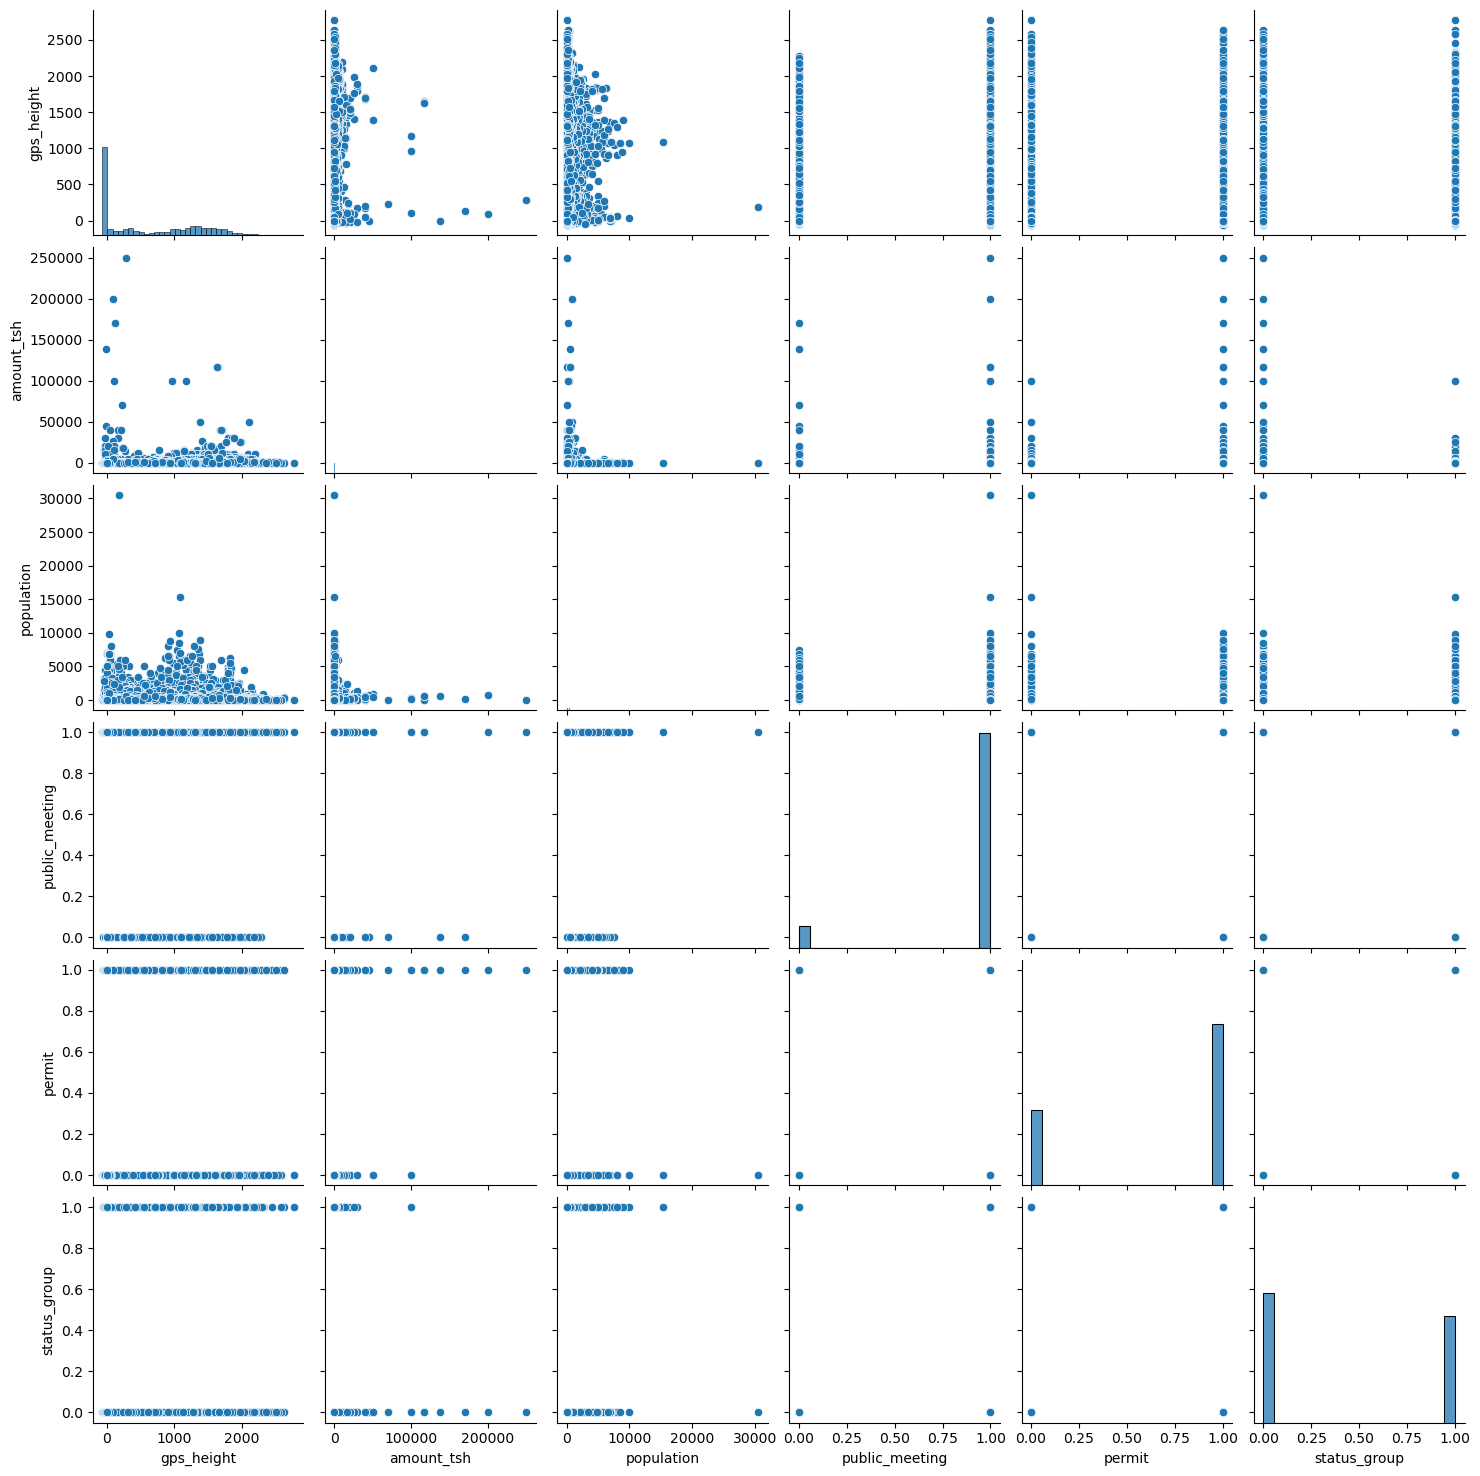

In [108]:
sns.pairplot(numerical_df)

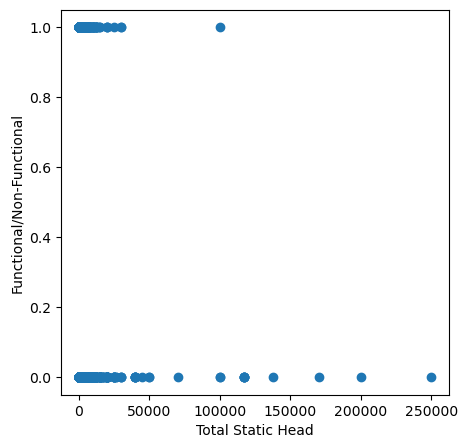

In [109]:
fig, ax = plt.subplots(figsize=(5,5))

plt.ylabel('Functional/Non-Functional')
plt.xlabel('Total Static Head')

plt.scatter(x=df_train['amount_tsh'], y=df_train['status_group'])

Above is an interesting plot which seems to show all water pumps where the total static head is above 110,000 are functional.

In [110]:
# Exploring the rows with tsh over 110,000
fake_df = df_train[df_train['amount_tsh'] > 110000]
fake_df[['amount_tsh', 'status_group']]

,amount_tsh,status_group
4691,117000.0,0
8370,138000.0,0
8914,117000.0,0
18576,250000.0,0
19109,200000.0,0
31423,117000.0,0
37237,117000.0,0
37817,170000.0,0
38157,117000.0,0


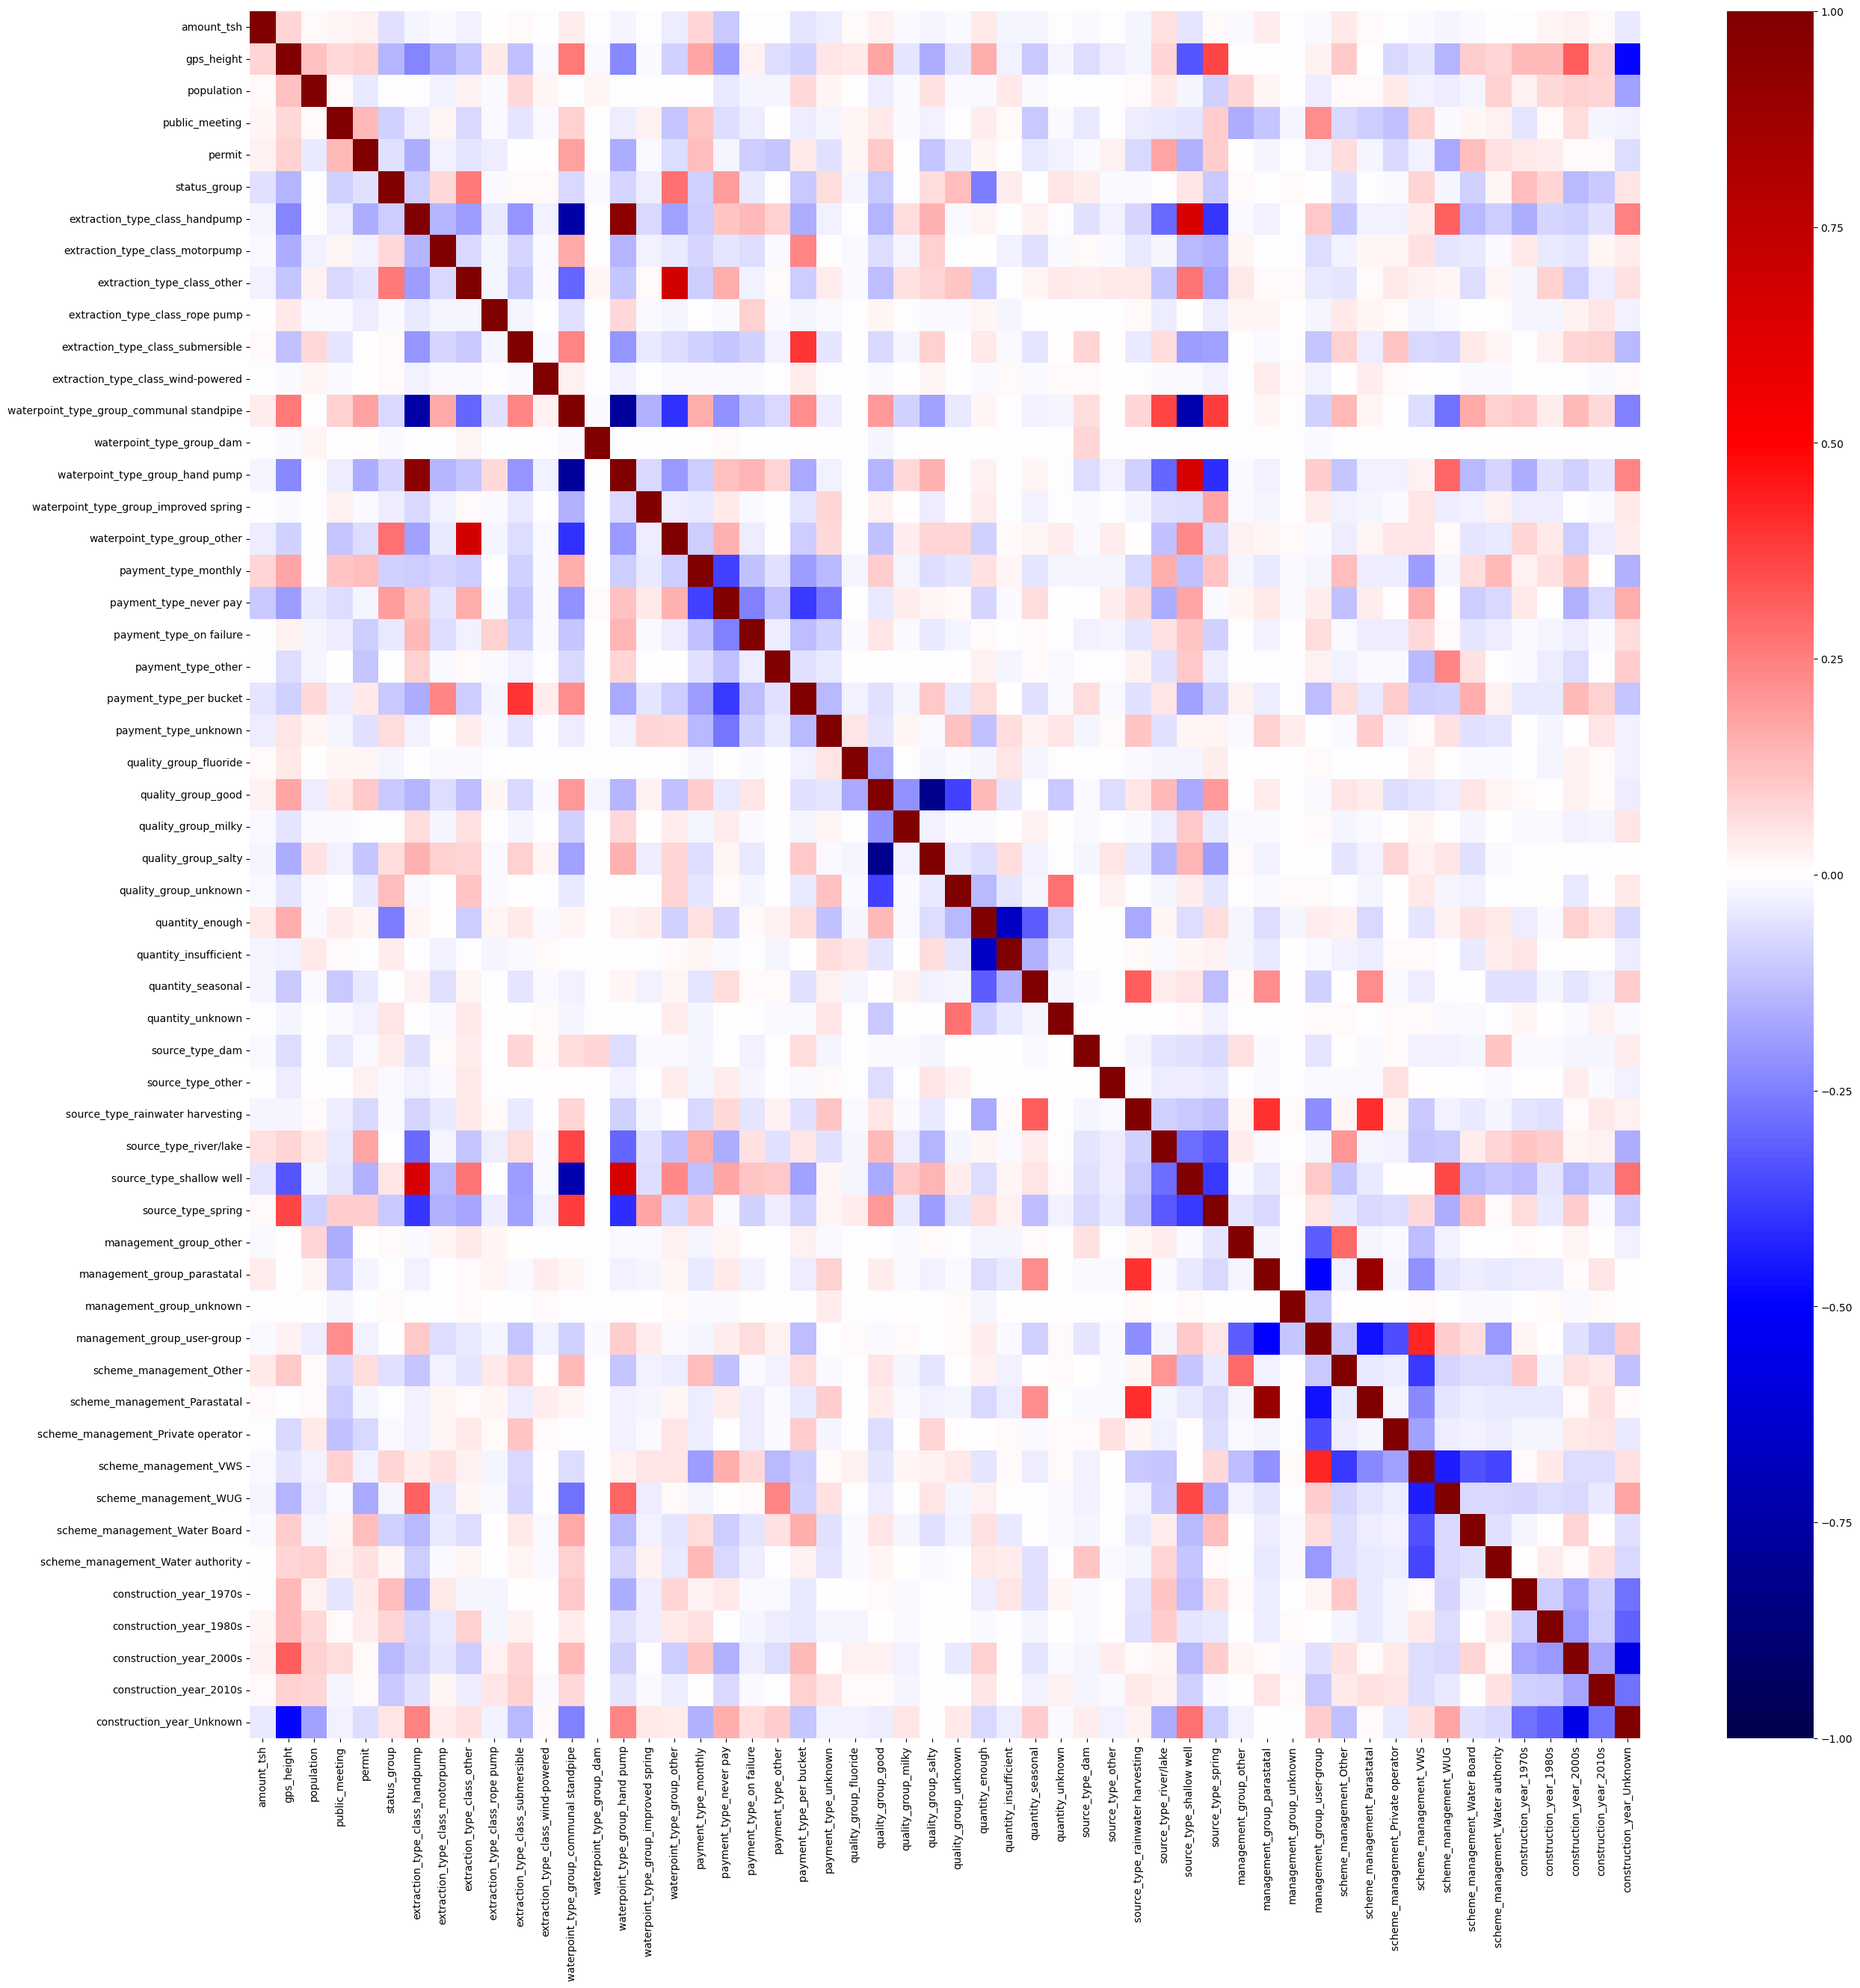

In [111]:
# Plot all correlations
fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(df_train.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

plt.show()

 several intriguing correlations were identified which are noteworthy for analysis.

* **`GPS height`** and **`Construction Year`**: A positive correlation was observed between GPS height and non-unknown construction year, although the reason for this remains unclear. An inverse correlation was found with the 2000s construction year, suggesting more low GPS height water pumps were built during this period.

* **`GPS height`** and **`Source Type`**: The GPS height of water pumps correlated positively with the source type '**spring**', and negatively with the '**shallow well**' source type. This correlation is intuitive as shallow wells are typically located at lower GPS heights.

* **`Extraction Type Class`** and **`Source Type`**: The extraction type class '**handpump**' showed negative correlation with the source type 'spring', a positive correlation with the '**shallow well**', and a slight negative correlation with '**river/lake**'. These correlations indicate that handpumps are typically used to draw water from springs or rivers/lakes, and less likely from shallow wells.

* **`Extraction Type Class`** and **`Waterpoint Type Group`**: The **`extraction type class`** '**handpump**' was highly positively correlated with the waterpoint type group '**hand pump**', and highly negatively correlated with the waterpoint type group 'communal standpipe'. These correlations suggest redundancy that might necessitate the removal of one of these features. A similar scenario was observed between the 'other' categories for extraction type class and waterpoint type group.

* **`Extraction Type Class`** and **`Payment Type`**: The **`extraction type`** class '*submersible*' correlated positively with the payment type '**per bucket**', indicating that water from submersible pumps is typically paid for per bucket.

* **`Waterpoint Type Group`** and **`Source Type`**: The **`waterpoint type group`** '**communal standpipe**' showed strong positive correlation with the source type '**spring**' and '**shallow lake**', and a strong negative correlation with the '**shallow well**'. This suggests that communal standpipes typically draw water from springs or shallow lakes and are less likely to draw from shallow wells.

* **`Source Type`** and **`Scheme Management`**: The source type '**rainwater harvesting**' correlated positively with the scheme management '**parastatal**', indicating that parastatal-managed water pumps tend to draw from rainwater harvesting. Similarly, the source type '**shallow well**' was positively correlated with scheme management '**WUG**', suggesting that WUG-managed pumps often draw water from shallow wells.

* **`Management Group`** and **`Scheme Management`**: Some strong correlations were identified between the management group and scheme management, suggesting redundancy and a potential need to drop the scheme management feature.

* Finally, the target variable '**`status group`**' had some correlation with **`quantity enough`**, **`waterpoint type other`**, and **`extraction type other`**. These correlations warrant further investigation for predictive modeling.

In [112]:
# Drop columns with high correlation
columns_to_drop = ['extraction_type_class_handpump',
                   'scheme_management_Private operator',
                   'scheme_management_Other',
                   'scheme_management_Parastatal',
                   'scheme_management_VWS',
                   'scheme_management_WUG',
                   'scheme_management_Water Board',
                   'scheme_management_Water authority',
                   'waterpoint_type_group_other']

for column in columns_to_drop:
    df_train.drop(columns=column, inplace=True)
    df_test.drop(columns=column, inplace=True)

df_train.head()

,amount_tsh,gps_height,population,public_meeting,permit,status_group,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,...,source_type_spring,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,construction_year_Unknown
0,6000.0,1390,109,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,25.0,686,250,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.0,263,58,1,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,20.0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [113]:
df_train.describe()

,amount_tsh,gps_height,population,public_meeting,permit,status_group,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,...,source_type_spring,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,construction_year_Unknown
count,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,...,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000
mean,353.103534,681.349517,172.077567,0.909041,0.680351,0.451436,0.053266,0.091235,0.004339,0.103448,...,0.304727,0.010909,0.026708,0.001455,0.899085,0.079699,0.097329,0.266759,0.080627,0.466984
std,2891.506826,698.732708,472.551974,0.287555,0.466346,0.497642,0.224567,0.287947,0.065726,0.304547,...,0.460298,0.103877,0.161232,0.038111,0.301220,0.270830,0.296409,0.442271,0.272265,0.498915
min,0.000000,-63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,405.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1323.000000,200.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,250000.000000,2770.000000,30500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Summary Using Statsmodels
## by Yu Hao

In [114]:
# Employing statsmodels for Logistic Regression
lm_1 = sm.Logit(df_train['status_group'],  # with statsmodels, `y` comes first
                sm.add_constant(df_train[['gps_height']]))  # and then `x`

lm_1 = lm_1.fit()

lm_1.summary()

Optimization terminated successfully.
         Current function value: 0.678008
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           status_group   No. Observations:                39875
Model:                          Logit   Df Residuals:                    39873
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                 0.01513
Time:                        03:20:12   Log-Likelihood:                -27036.
converged:                       True   LL-Null:                       -27451.
Covariance Type:            nonrobust   LLR p-value:                1.207e-182
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0867      0.014      6.177      0.000       0.059       0.114
gps_height    -0.0004   1.48e-05    -28.495      0.000      -0.000      -0.000
==============================================================================
"""

## Multiple Logistic Regression
## by Yu Hao

In [115]:
X = df_train.drop(columns='status_group')
y = df_train['status_group']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
#Scale since there are multiple features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Scale test features

In [118]:
# Find the best C value without polynomial features. 
# The C value controls the amount of regularization. Smaller numbers = more regularization.
C = [.001, .1, 1, 10]

for c in C:
    # Regularize features. L1 shrinks coefficients to 0
    logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=c) 

    #Fit model on training data
    logistic_model.fit(X_train, y_train) 
    
    print("C is:", c)
    for feature, coef in zip(X.columns, logistic_model.coef_[0]):
        print(feature, ':', f'{coef:.2f}')
    print('Training accuracy:', logistic_model.score(X_train, y_train))
    print('Test accuracy:', logistic_model.score(X_test, y_test))
    print('')

C is: 0.001
amount_tsh : 0.00
gps_height : -0.03
population : 0.00
public_meeting : -0.01
permit : 0.00
extraction_type_class_motorpump : 0.05
extraction_type_class_other : 0.40
extraction_type_class_rope pump : 0.00
extraction_type_class_submersible : 0.00
extraction_type_class_wind-powered : 0.00
waterpoint_type_group_communal standpipe : 0.00
waterpoint_type_group_dam : 0.00
waterpoint_type_group_hand pump : -0.00
waterpoint_type_group_improved spring : 0.00
payment_type_monthly : 0.00
payment_type_never pay : 0.16
payment_type_on failure : 0.00
payment_type_other : 0.00
payment_type_per bucket : 0.00
payment_type_unknown : 0.00
quality_group_fluoride : 0.00
quality_group_good : 0.00
quality_group_milky : 0.00
quality_group_salty : 0.00
quality_group_unknown : 0.04
quantity_enough : -0.39
quantity_insufficient : -0.06
quantity_seasonal : -0.03
quantity_unknown : 0.00
source_type_dam : 0.00
source_type_other : 0.00
source_type_rainwater harvesting : 0.00
source_type_river/lake : 0.00

In [119]:
# Find the best C value with polynomial features
C = [.001, .1, 1, 10]

p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train)

for c in C:
    # Regularize features. L1 shrinks coefficients to 0
    logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=c) 

    #Fit model on training data
    logistic_model.fit(X_train_poly, y_train) 
    
    print("C is:", c)
    myList = list(zip(p.get_feature_names(X.columns),logistic_model.coef_[0]))
    for element in myList:
        print(element[0], ": ", round(element[1], 2))
    print('Training accuracy:', logistic_model.score(X_train_poly, y_train))
    print('Test accuracy:', logistic_model.score(p.transform(X_test), y_test))
    print('')

C is: 0.001
1 :  0.0
amount_tsh :  0.0
gps_height :  0.0
population :  0.0
public_meeting :  0.0
permit :  0.0
extraction_type_class_motorpump :  0.0
extraction_type_class_other :  0.0
extraction_type_class_rope pump :  0.0
extraction_type_class_submersible :  0.0
extraction_type_class_wind-powered :  0.0
waterpoint_type_group_communal standpipe :  0.0
waterpoint_type_group_dam :  0.0
waterpoint_type_group_hand pump :  0.0
waterpoint_type_group_improved spring :  0.0
payment_type_monthly :  0.0
payment_type_never pay :  0.14
payment_type_on failure :  0.0
payment_type_other :  0.0
payment_type_per bucket :  0.0
payment_type_unknown :  0.0
quality_group_fluoride :  0.0
quality_group_good :  0.0
quality_group_milky :  0.0
quality_group_salty :  0.0
quality_group_unknown :  0.0
quantity_enough :  -0.48
quantity_insufficient :  0.0
quantity_seasonal :  0.0
quantity_unknown :  0.0
source_type_dam :  0.0
source_type_other :  0.0
source_type_rainwater harvesting :  0.0
source_type_river/lake 

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


C is: 0.1
1 :  0.0
amount_tsh :  0.0
gps_height :  0.07
population :  -0.03
public_meeting :  0.0
permit :  0.0
extraction_type_class_motorpump :  0.0
extraction_type_class_other :  0.0
extraction_type_class_rope pump :  0.0
extraction_type_class_submersible :  0.0
extraction_type_class_wind-powered :  0.0
waterpoint_type_group_communal standpipe :  0.0
waterpoint_type_group_dam :  0.0
waterpoint_type_group_hand pump :  -0.19
waterpoint_type_group_improved spring :  0.0
payment_type_monthly :  0.0
payment_type_never pay :  0.22
payment_type_on failure :  0.0
payment_type_other :  0.0
payment_type_per bucket :  0.0
payment_type_unknown :  0.0
quality_group_fluoride :  0.0
quality_group_good :  0.0
quality_group_milky :  0.0
quality_group_salty :  0.0
quality_group_unknown :  0.0
quantity_enough :  -1.14
quantity_insufficient :  0.0
quantity_seasonal :  0.0
quantity_unknown :  0.0
source_type_dam :  0.0
source_type_other :  0.0
source_type_rainwater harvesting :  0.0
source_type_river/la

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


C is: 1
1 :  0.02
amount_tsh :  -0.31
gps_height :  0.16
population :  -0.07
public_meeting :  0.0
permit :  0.0
extraction_type_class_motorpump :  0.0
extraction_type_class_other :  0.0
extraction_type_class_rope pump :  0.0
extraction_type_class_submersible :  0.0
extraction_type_class_wind-powered :  0.0
waterpoint_type_group_communal standpipe :  -0.14
waterpoint_type_group_dam :  0.0
waterpoint_type_group_hand pump :  -0.39
waterpoint_type_group_improved spring :  0.0
payment_type_monthly :  0.0
payment_type_never pay :  0.19
payment_type_on failure :  0.0
payment_type_other :  0.0
payment_type_per bucket :  0.0
payment_type_unknown :  0.0
quality_group_fluoride :  0.0
quality_group_good :  0.02
quality_group_milky :  0.0
quality_group_salty :  0.0
quality_group_unknown :  0.0
quantity_enough :  -1.61
quantity_insufficient :  -0.57
quantity_seasonal :  -0.2
quantity_unknown :  0.0
source_type_dam :  0.0
source_type_other :  0.0
source_type_rainwater harvesting :  0.0
source_type_r

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


C is: 10
1 :  0.19
amount_tsh :  -0.64
gps_height :  0.21
population :  -0.08
public_meeting :  0.0
permit :  0.0
extraction_type_class_motorpump :  0.06
extraction_type_class_other :  0.0
extraction_type_class_rope pump :  0.0
extraction_type_class_submersible :  0.0
extraction_type_class_wind-powered :  0.02
waterpoint_type_group_communal standpipe :  -0.24
waterpoint_type_group_dam :  0.0
waterpoint_type_group_hand pump :  -0.45
waterpoint_type_group_improved spring :  0.0
payment_type_monthly :  0.0
payment_type_never pay :  0.01
payment_type_on failure :  0.0
payment_type_other :  0.0
payment_type_per bucket :  0.0
payment_type_unknown :  0.0
quality_group_fluoride :  0.0
quality_group_good :  0.13
quality_group_milky :  -0.1
quality_group_salty :  0.07
quality_group_unknown :  0.0
quantity_enough :  -1.86
quantity_insufficient :  -0.51
quantity_seasonal :  -0.22
quantity_unknown :  0.0
source_type_dam :  0.0
source_type_other :  0.0
source_type_rainwater harvesting :  -0.11
sourc

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Logistic Regression using best C Score
## by Yu Hao

In [120]:
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=.1) # Create model

logistic_model.fit(X_train, y_train) # Fit model on training data

preds = logistic_model.predict(X_test) # Make predictions using test features

preds

array([1, 1, 1, ..., 0, 1, 1])

## Logistic Regression-  Confusion Matrix and Metric Scores
## by Yu Hao

In [121]:
def make_confusion_matrix(model, threshold=.5):
    """
    Creates a heat map confusion matrix, and prints out precision, recall, F1,
    accuracy, training, and test scores.
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    fig, ax = plt.subplots(figsize=(8,6))
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    functional_confusion = confusion_matrix(y_test, y_predict)

    #Print the heatmap
    group_names = ['True Neg','False Po','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
            functional_confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
            functional_confusion.flatten()/np.sum(functional_confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    xlabels = ['functional', 'non-functional']
    ylabels = ['functional', 'non-functional']
    sns.heatmap(functional_confusion, annot=labels, fmt='', cmap='Blues', 
                xticklabels=xlabels, yticklabels=ylabels)
    ax.set_ylim([2,0])
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
    #Princt various scores/metrics
    print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
    print("F1 Score: ", f1_score(y_test, y_predict))
    print("ROC AUC score : ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
    print("Accuracy score: ", accuracy_score(y_test, y_predict))
    
    print('Training accuracy:', model.score(X_train, y_train))
    print('Test accuracy:', model.score(X_test, y_test))


Precision: 0.7841,   Recall: 0.5482
F1 Score:  0.6452357401912299
ROC AUC score :  0.7875654098188651
Accuracy score:  0.7301567398119122
Training accuracy: 0.7341065830721003
Test accuracy: 0.7301567398119122


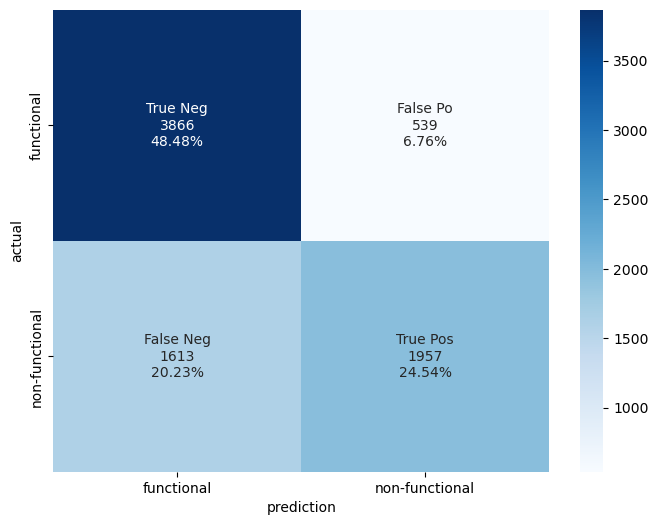

In [122]:
make_confusion_matrix(logistic_model)

In [123]:
interactive(lambda threshold: make_confusion_matrix(logistic_model, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [124]:
# Print the features and their coefficients
for feature, coef in zip(X.columns, logistic_model.coef_[0]):
    print(feature, ':', f'{coef:.2f}')

amount_tsh : -0.19
gps_height : -0.12
population : -0.01
public_meeting : -0.14
permit : -0.09
extraction_type_class_motorpump : 0.11
extraction_type_class_other : 0.36
extraction_type_class_rope pump : 0.00
extraction_type_class_submersible : 0.09
extraction_type_class_wind-powered : 0.01
waterpoint_type_group_communal standpipe : -0.56
waterpoint_type_group_dam : -0.08
waterpoint_type_group_hand pump : -0.72
waterpoint_type_group_improved spring : -0.20
payment_type_monthly : 0.12
payment_type_never pay : 0.39
payment_type_on failure : 0.05
payment_type_other : 0.07
payment_type_per bucket : -0.10
payment_type_unknown : 0.23
quality_group_fluoride : -0.05
quality_group_good : 0.00
quality_group_milky : -0.06
quality_group_salty : 0.03
quality_group_unknown : 0.12
quantity_enough : -1.99
quantity_insufficient : -1.51
quantity_seasonal : -0.95
quantity_unknown : -0.20
source_type_dam : 0.03
source_type_other : -0.12
source_type_rainwater harvesting : -0.18
source_type_river/lake : -0.1

## Logistic Regression - ROC
## by Yu Hao

Logistic: ROC AUC=0.788


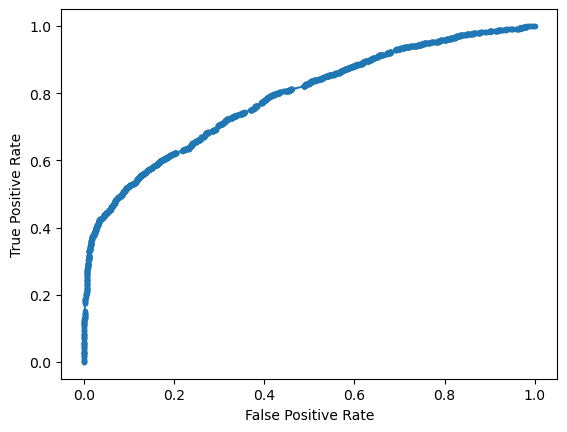

In [125]:
# Predict probabilities
lr_probs = logistic_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate score
lr_auc = roc_auc_score(y_test, lr_probs)

# print score
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the ROC curve
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Each one of these points represents a different probability threshold, and the area under the curve (AUC) can be thought of as a measure of separability between the two classes (functional or non-functional) when we only use the features of the model. A perfect right angle is a perfect model (unrealistic), and a diagonal line is just as good as a flip of the coin.

## KNN Model
## by Yu Hao

In [126]:
X = df_train.drop(columns='status_group')
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale since there are multiple features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Scale test features

In [127]:
# Run the model with various k values, storing their scores in score_list
k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

Text(0, 0.5, 'Testing Accuracy')

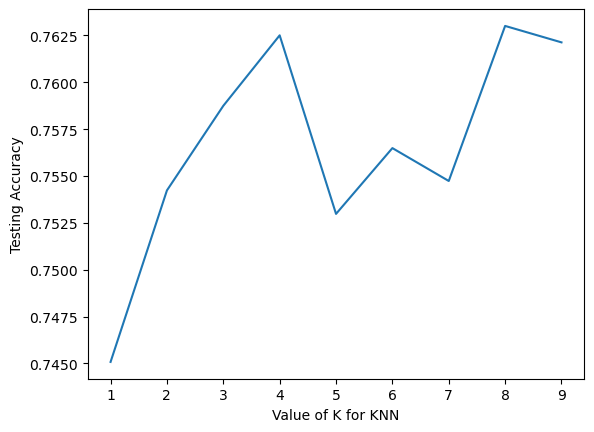

In [128]:
# Plot the scores for each K value
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [129]:
# Find and print the best k value and its corresponding score
index = 0
max_num = 0
for k in scores_list:
    if k > max_num:
        max_num = k
        max_index = index
        index+=1
    else:
        index+=1
print("The best k is ", max_index + 1, 
      ' which has a score of ', round(max_num, 4))

The best k is  8  which has a score of  0.763


In [130]:
# Using KNN with the best k value
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [131]:
# Print confusion matrix and metrics for KNN
interactive(lambda threshold: make_confusion_matrix(knn, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

## KNN - ROC
## by Yu Hao

KNN: ROC AUC=0.825


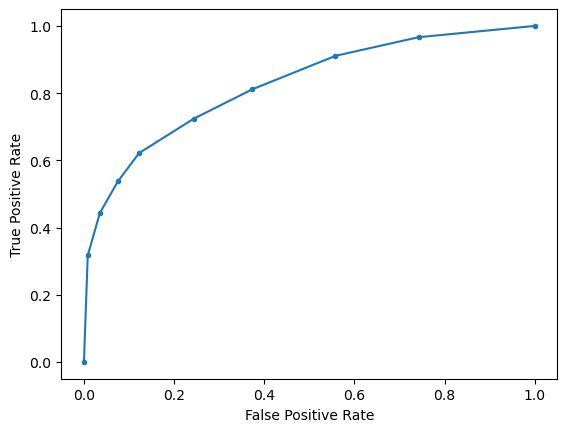

In [132]:
# Predict probabilities
knn_probs = knn.predict_proba(X_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# calculate score
knn_auc = roc_auc_score(y_test, knn_probs)

# print score
print('KNN: ROC AUC=%.3f' % (knn_auc))

# calculate ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# plot the ROC curve
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Random Forest Model
## by Yiming Yuan

In [133]:
#Split data
X = df_train.drop(columns='status_group')
y = df_train['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [134]:
#Create classifier
clf=RandomForestClassifier(n_estimators=100)

#Train model
clf.fit(X_train,y_train)

#Predict y values for test set
y_pred=clf.predict(X_test)

In [135]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.779319568670066


In [136]:
# print features in order of importance for the model
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

gps_height                                  0.248233
population                                  0.147410
quantity_enough                             0.066735
amount_tsh                                  0.062340
extraction_type_class_other                 0.052814
quantity_insufficient                       0.037634
permit                                      0.026844
payment_type_never pay                      0.022759
quantity_seasonal                           0.021804
waterpoint_type_group_communal standpipe    0.020556
waterpoint_type_group_hand pump             0.020040
source_type_spring                          0.017918
management_group_user-group                 0.017268
public_meeting                              0.015654
source_type_shallow well                    0.015648
construction_year_2000s                     0.015410
construction_year_1970s                     0.015374
construction_year_2010s                     0.013762
extraction_type_class_submersible           0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


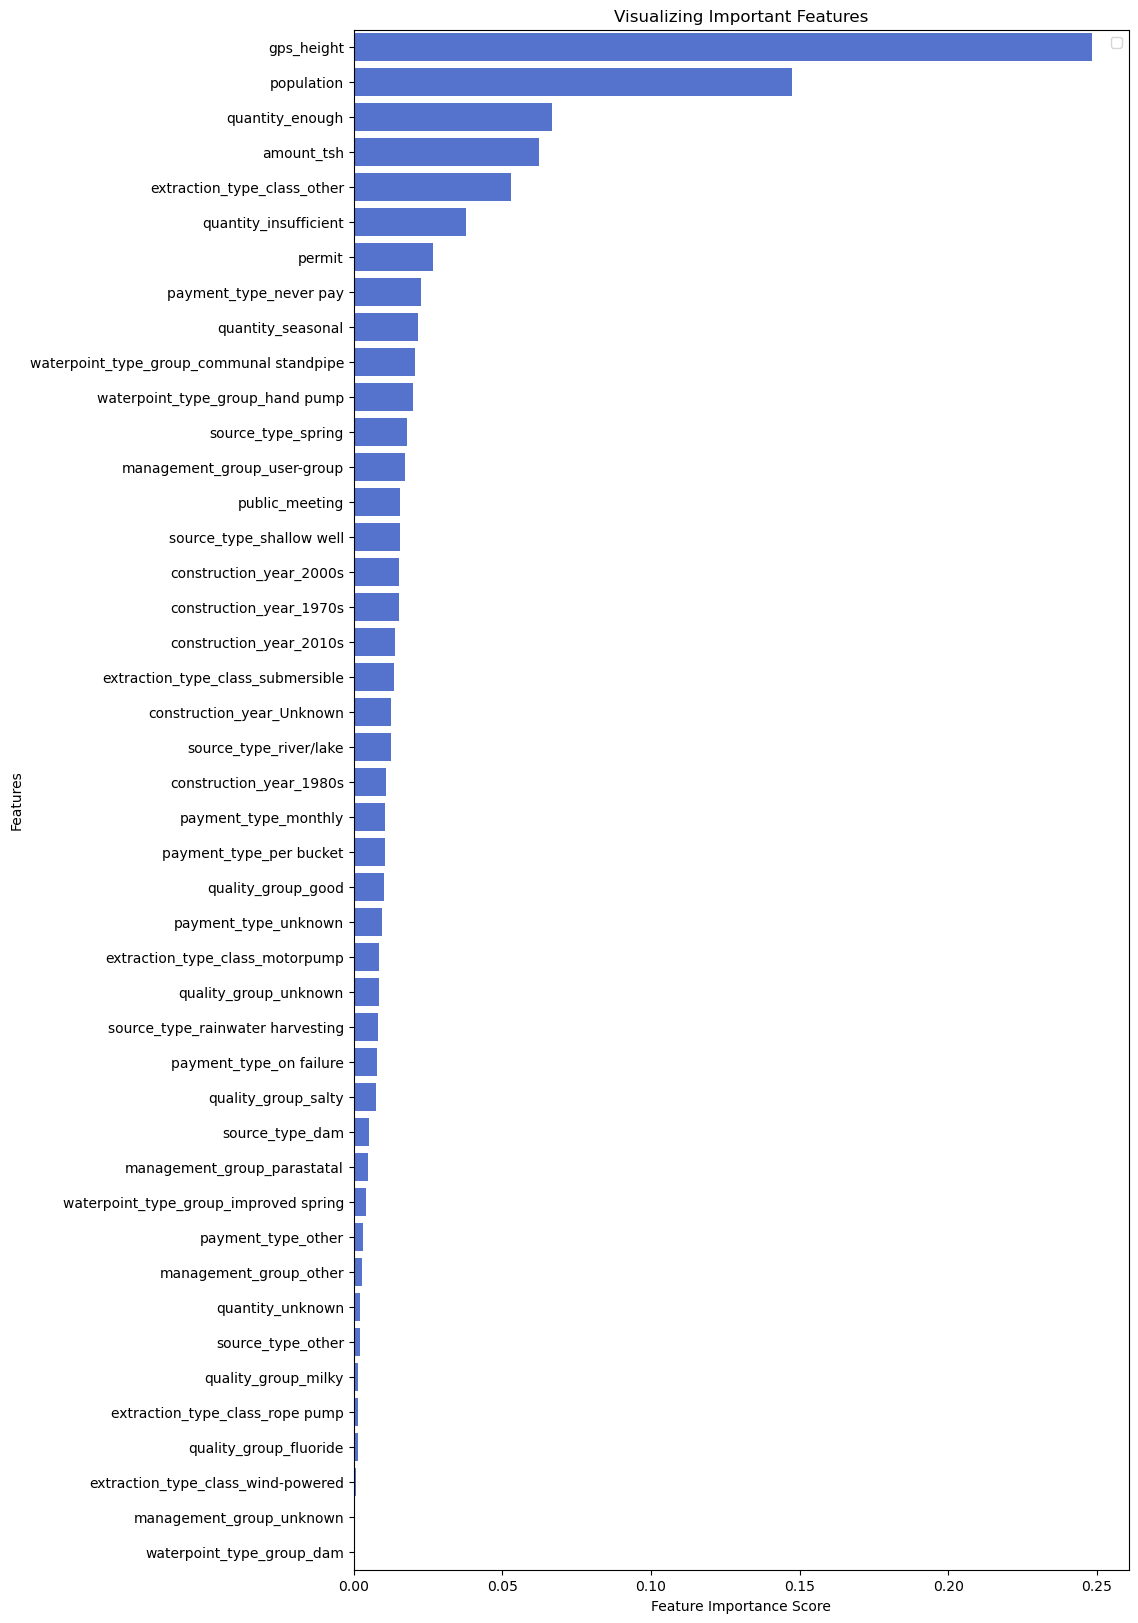

In [137]:
# Create a bar plot of the feature importances

fig, ax = plt.subplots(figsize=(10, 20))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='royalblue')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [138]:
interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

## Random Forest - ROC
## by Yiming Yuan

Random Forest: ROC AUC=0.856


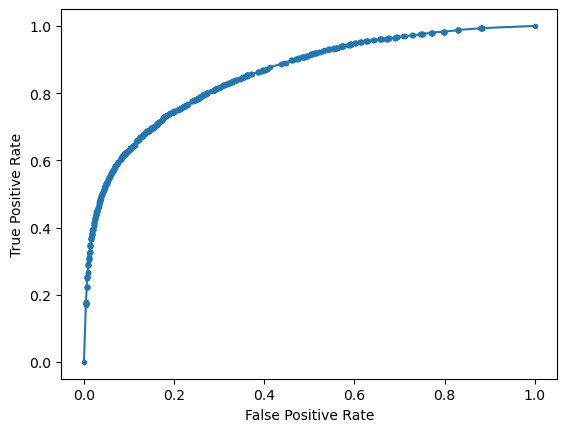

In [139]:
# Predict probabilities
clf_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
clf_probs = clf_probs[:, 1]

# calculate score
clf_auc = roc_auc_score(y_test, clf_probs)

# print score
print('Random Forest: ROC AUC=%.3f' % (clf_auc))

# calculate ROC curve
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)

# plot the ROC curve
plt.plot(clf_fpr, clf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## XGBoost
## by Yiming Yuan

In [140]:
X = df_train.drop(columns='status_group')
y = df_train['status_group']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [142]:
# Create model
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:squarederror",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False #gives output log as below
                   )

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [143]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [144]:
# Print room mean squared error
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test)

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.49092070112823544

In [145]:
# Print accuracy
y_pred = gbm.predict(X_val)
accuracy = round(accuracy_score(y_val, y_pred) * 100, 2)
accuracy

76.29

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

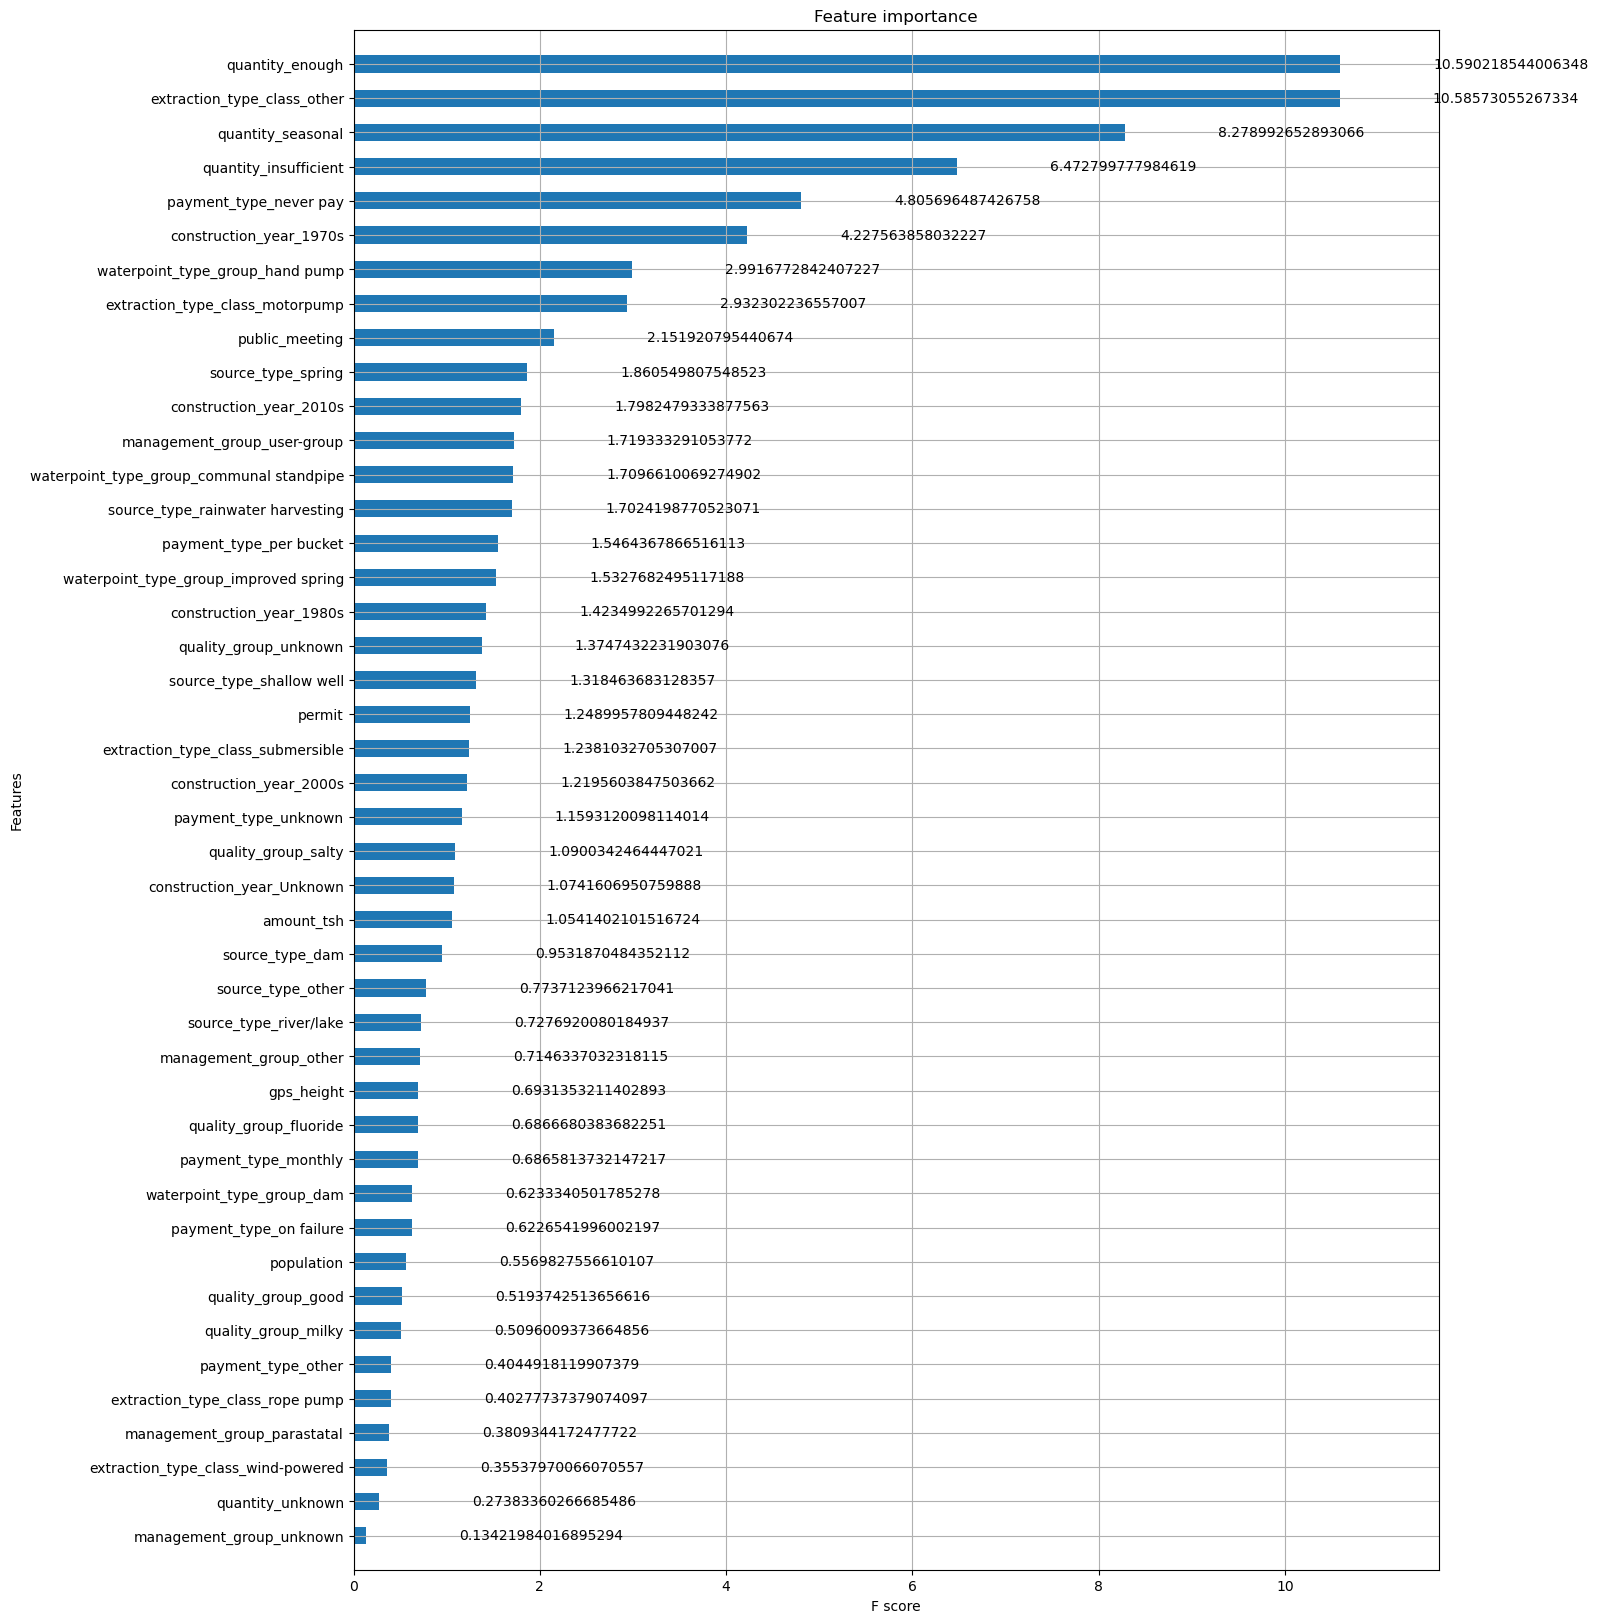

In [146]:
#Cumulative information gain from tree splits on that feature
plt.rcParams["figure.figsize"] = (14, 20)

xgb.plot_importance(gbm, importance_type='gain', height = .5) 

In [147]:
# Print confusion matrix and metrics
interactive(lambda threshold: make_confusion_matrix(gbm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

## XGBoost - Tuning Parameters
## by Yiming Yuan

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [149]:
print('Parameters currently in use:\n')
pprint(gbm.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 30000,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': None,
 'use_label_encoder': None,
 'validate_parameters': None,
 'verbosity': None}


In [150]:
gbm = xgb.XGBClassifier()

# Grid of hyperparameters and values to try out
param_grid = {
        'max_depth': [3, 6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

rs_clf = RandomizedSearchCV(gbm, param_distributions=param_grid, n_iter=9,
                            n_jobs=1, verbose=3, cv=3,
                            scoring='roc_auc', refit=False, random_state=42)

rs_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END colsample_bylevel=0.4, colsample_bytree=0.8, gamma=0.5, learning_rate=0, max_depth=20, min_child_weight=5.0, n_estimators=100, reg_lambda=50.0, subsample=0.7;, score=0.500 total time=   1.0s
[CV 2/3] END colsample_bylevel=0.4, colsample_bytree=0.8, gamma=0.5, learning_rate=0, max_depth=20, min_child_weight=5.0, n_estimators=100, reg_lambda=50.0, subsample=0.7;, score=0.500 total time=   1.0s
[CV 3/3] END colsample_bylevel=0.4, colsample_bytree=0.8, gamma=0.5, learning_rate=0, max_depth=20, min_child_weight=5.0, n_estimators=100, reg_lambda=50.0, subsample=0.7;, score=0.500 total time=   1.0s
[CV 1/3] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=1.0, learning_rate=0.2, max_depth=10, min_child_weight=1.0, n_estimators=100, reg_lambda=1.0, subsample=0.6;, score=0.845 total time=   1.4s
[CV 2/3] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=1.0, learning_rate=0.2, max_depth=10, min_child_weight=1.0,

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                              1.0],
                           

In [151]:
# Print the best score and hyperparameters from RandomizedSearchCV
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_

print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.8479244083041687
Best params: 
colsample_bylevel: 0.7
colsample_bytree: 0.8
gamma: 1.0
learning_rate: 0.2
max_depth: 10
min_child_weight: 1.0
n_estimators: 100
reg_lambda: 1.0
subsample: 0.6


In [152]:
# Create model using best hyperparameters
gbm = xgb.XGBClassifier( 
                       n_estimators=100, #arbitrary large number
                       max_depth=10,
                       objective="reg:squarederror",
                       learning_rate=.2, 
                       subsample=.6,
                       min_child_weight=1,
                       colsample_bytree=.8,
                       colsample_bylevel=.7,
                       gamma=1,
                       reg_lambda=1
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False #gives output log as below
                   )

/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/lukamagic/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [153]:
# Print accuracy
y_pred = gbm.predict(X_val)
accuracy = round(accuracy_score(y_val, y_pred) * 100, 2)
accuracy

77.34

In [154]:
# Print confusion matrix and metrics
interactive(lambda threshold: make_confusion_matrix(gbm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…